In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from corm import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/accre_data_analysis/corm/')

In [5]:
traces = {}
for trace in ['a']:
    traces[trace] = [np.load('corm_dreamzs_5chain_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('corm_dreamzs_5chain_sampled_params_chain_'+str(chain)+'.npy'))

In [6]:
logps = {}
for trace in ['a']:
    logps[trace] = [np.load('corm_dreamzs_5chain_logps_chain_0.npy')]
    for chain in range(1, 3):
        logps[trace].append(np.load('corm_dreamzs_5chain_logps_chain_'+str(chain)+'.npy'))

In [7]:
traces['a'][0].shape

(200000, 12)

In [9]:
sampled_parameter_names = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2']

In [11]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = sampled_parameter_names
for run in ['a']:
    for i, param in enumerate(sampled_parameter_names):
        param_trace_dict_a[param] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = sampled_parameter_names

In [12]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  12  of  12  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  12  of  12  parameters.
Percent of parameters with GR below 1.1:  100.0


[12, 100.0, 12, 100.0]

In [89]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  87  of  105  parameters.
Percent of parameters with GR below 1.2:  82.8571428571
Number of parameters with GR below 1.1:  51  of  105  parameters.
Percent of parameters with GR below 1.1:  48.5714285714


[87, 82.85714285714286, 51, 48.57142857142857]

In [90]:
print_convergence_summary(param_trace_dicts['c'])

KeyError: 'c'

In [91]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  101  of  105  parameters.
Percent of parameters with GR below 1.2:  96.1904761905
Number of parameters with GR below 1.1:  77  of  105  parameters.
Percent of parameters with GR below 1.1:  73.3333333333


[101, 96.19047619047619, 77, 73.33333333333333]

200000
3
200000


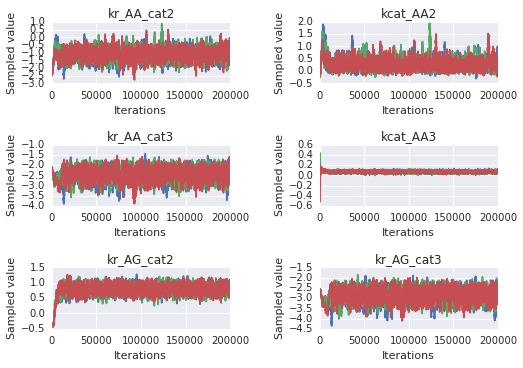

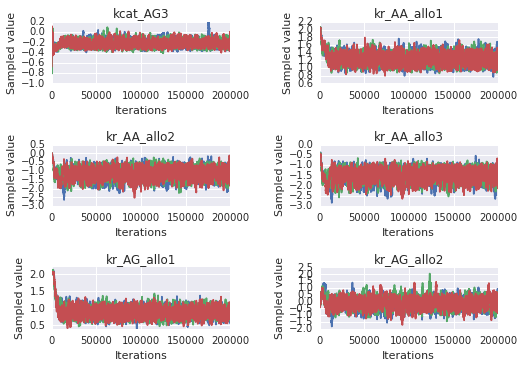

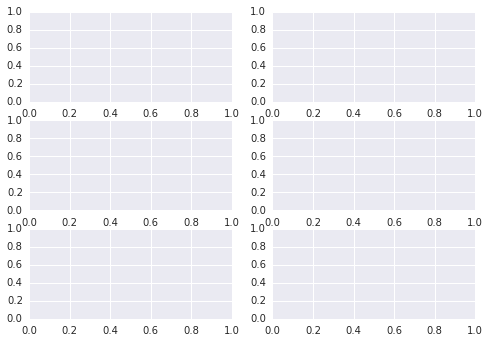

In [13]:
sample_plots(param_trace_dicts['a'])

100000
3
100000


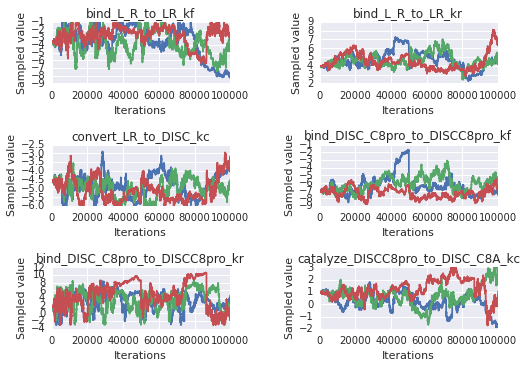

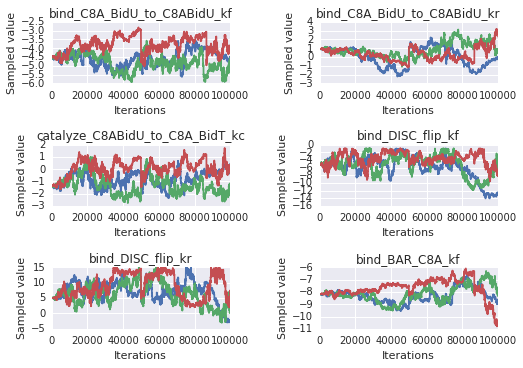

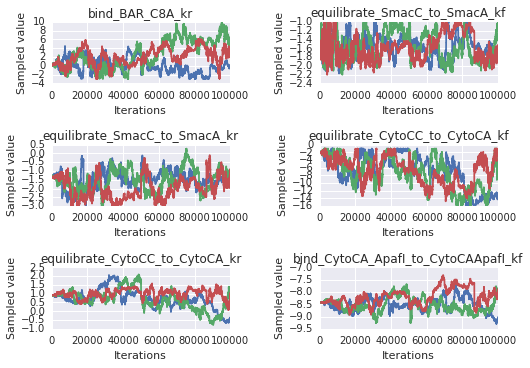

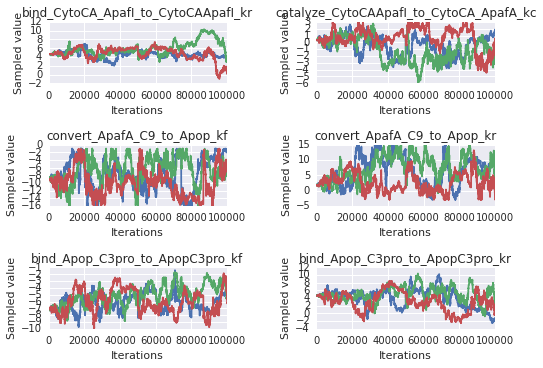

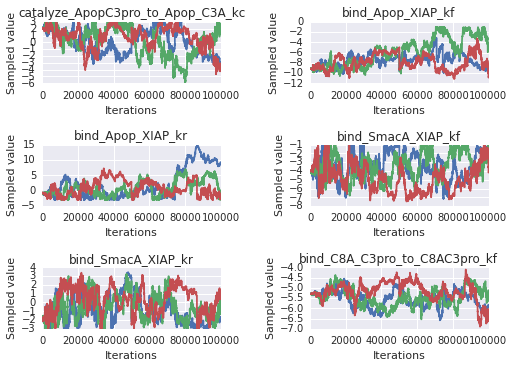

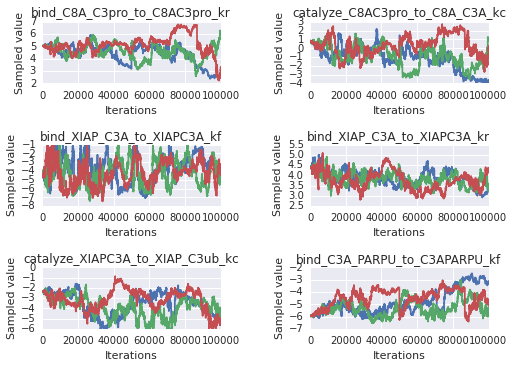

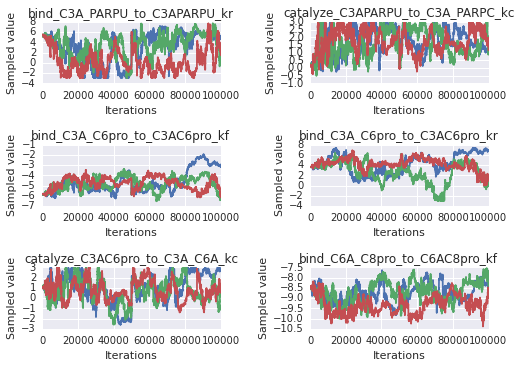

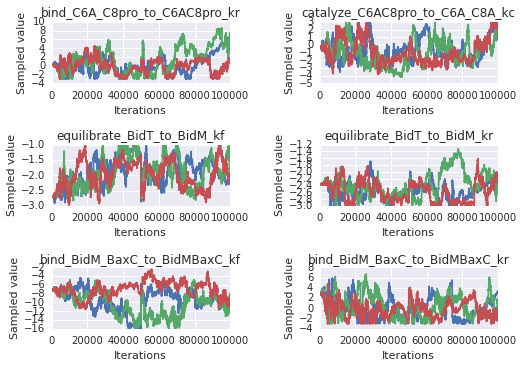

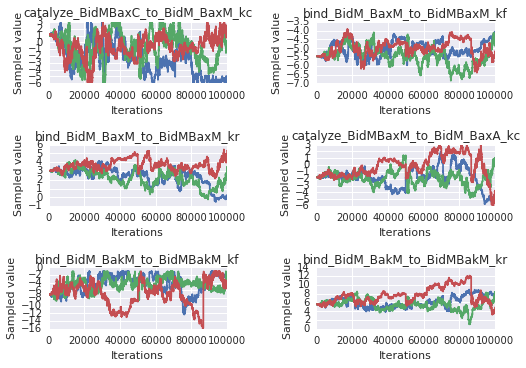

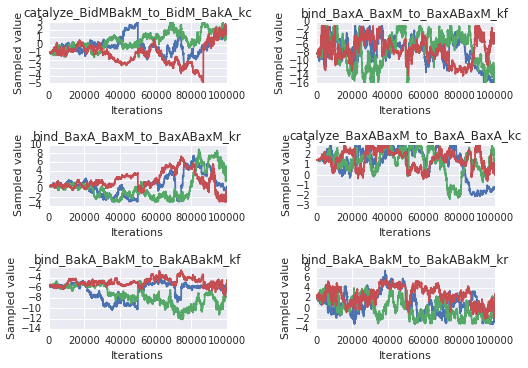

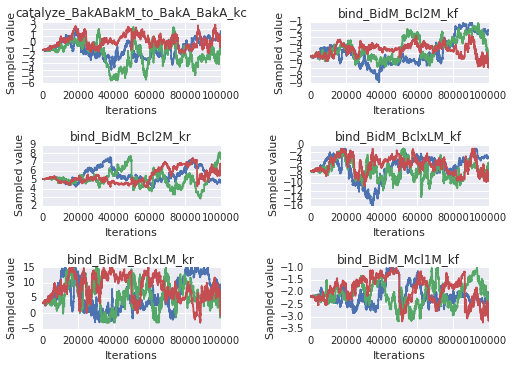

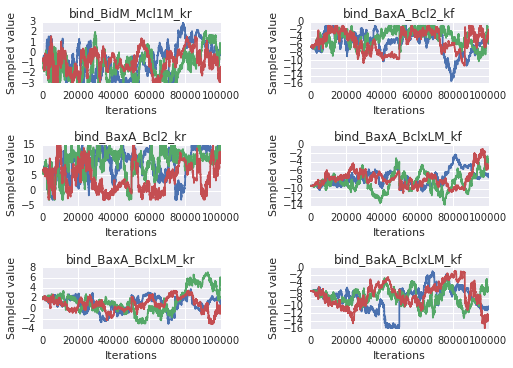

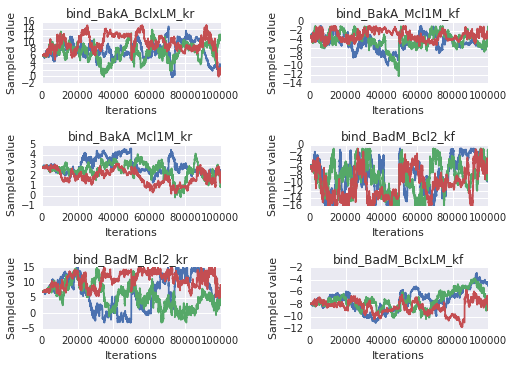

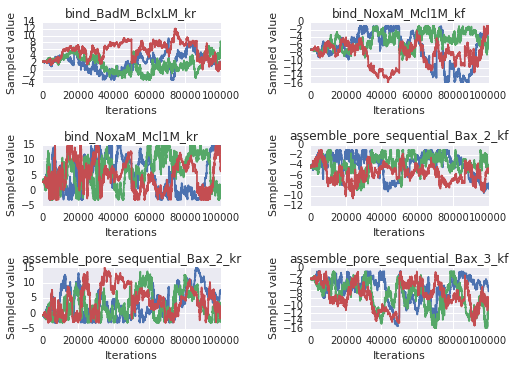

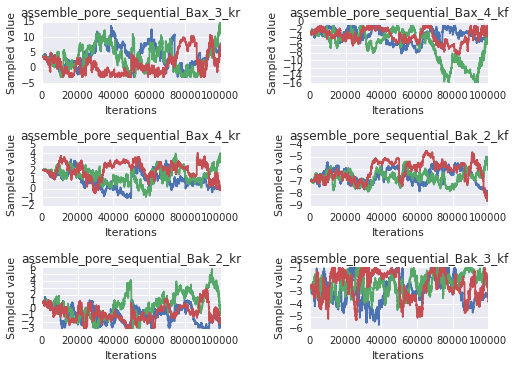

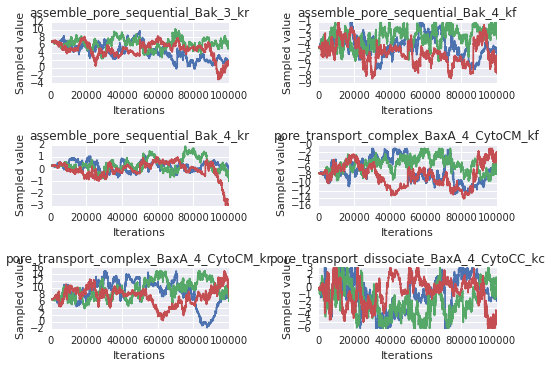

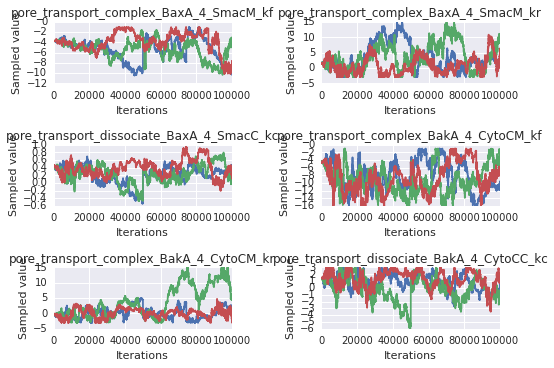

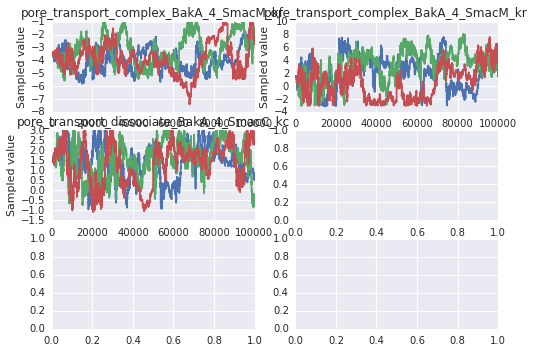

In [93]:
sample_plots(param_trace_dicts['b'])

In [ ]:
sample_plots(param_trace_dicts['c'])

In [14]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=25000, thin=1)
#trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=25000, thin=1)
#trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=25000, thin=1)
#trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=25000, thin=1)

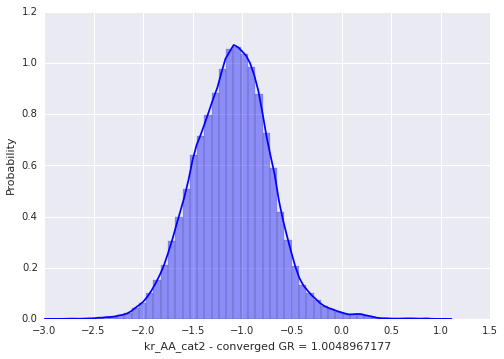

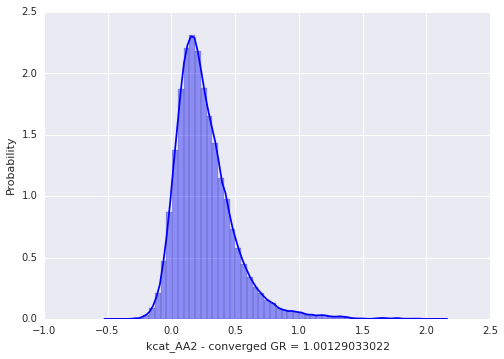

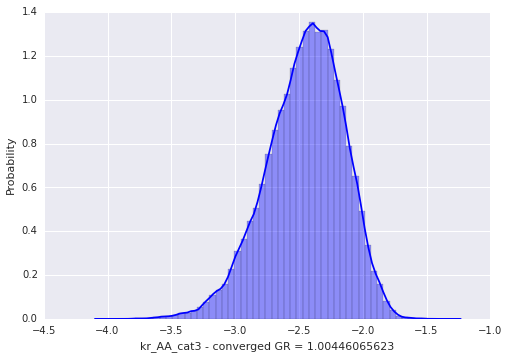

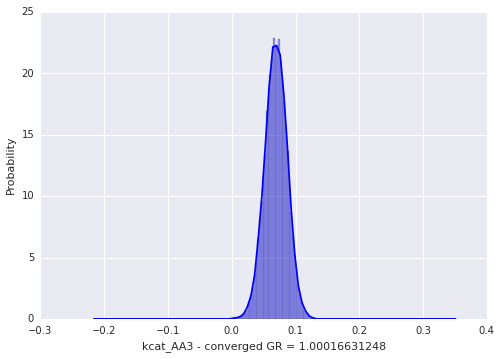

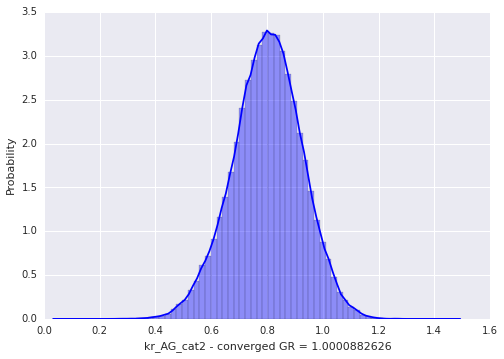

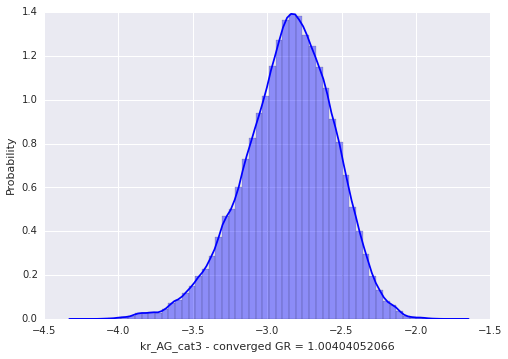

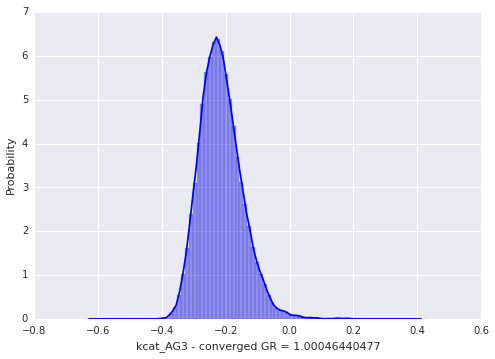

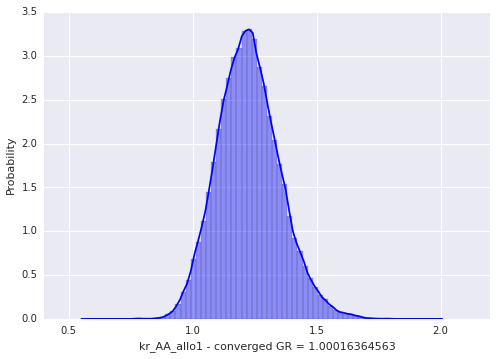

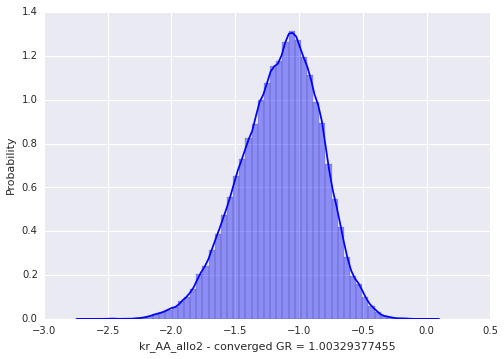

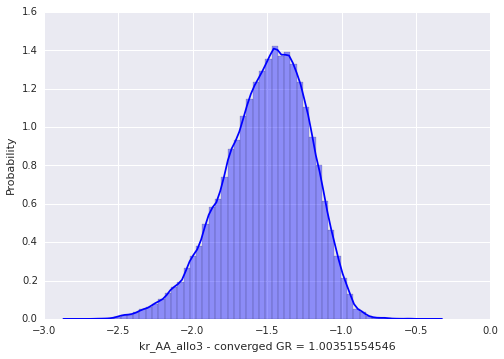

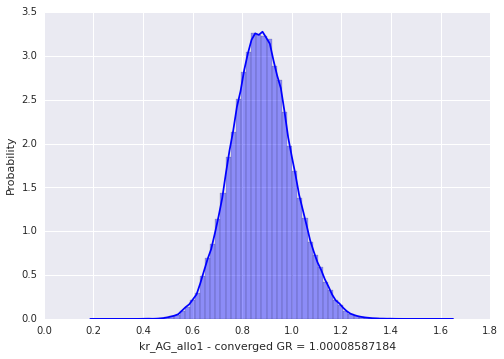

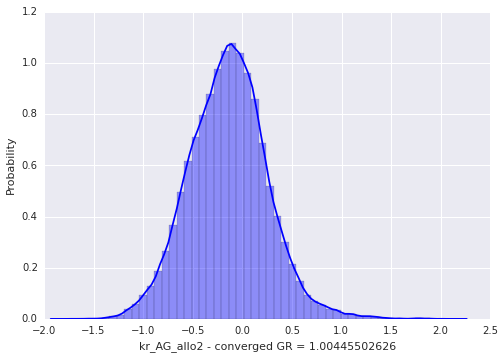

In [16]:
for dim, param_name in enumerate(sampled_parameter_names):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b', norm_hist=True)
    #sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    #sns.distplot(trace_arr_c[:,dim], hist=True, color='r')
    #sns.distplot(trace_arr_d[:,dim], hist=True, color='g')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [98]:
traces['a'][1][:,0]

array([-3.63055501, -3.63055501, -3.63055501, ..., -3.07379971,
       -3.07379971, -3.07379971])

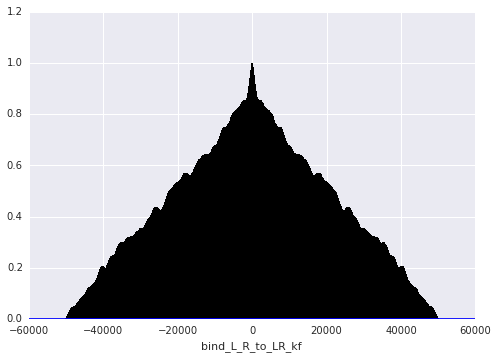

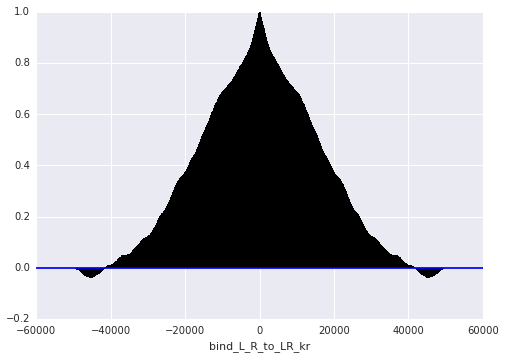

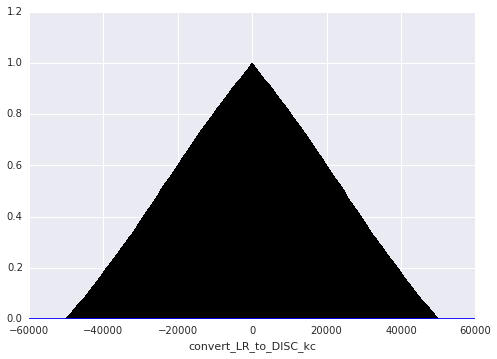

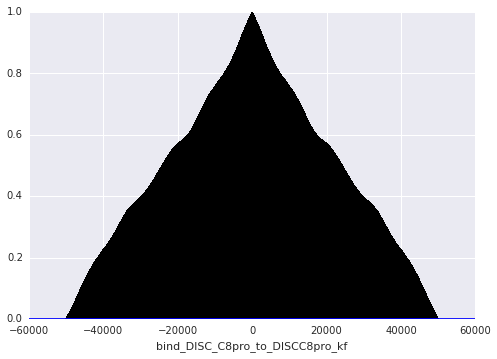

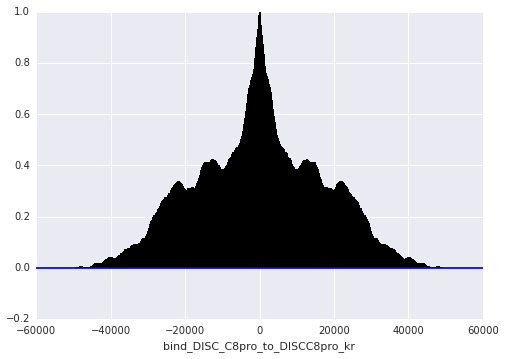

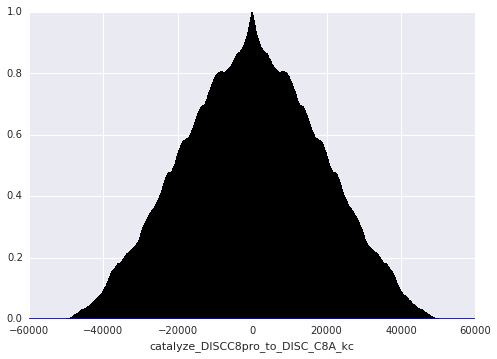

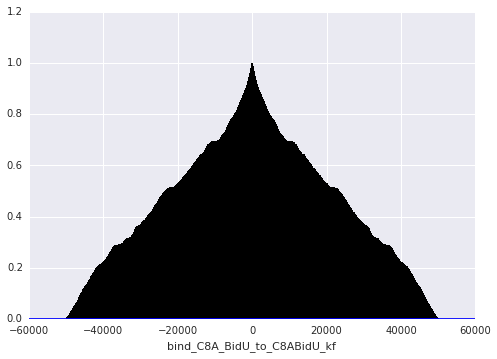

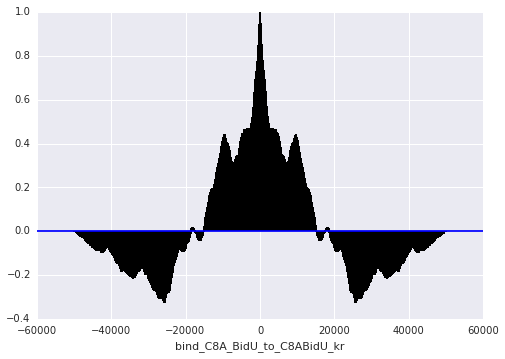

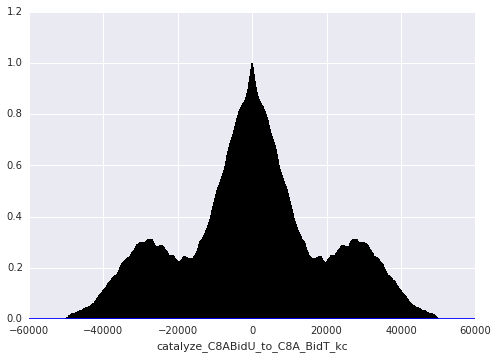

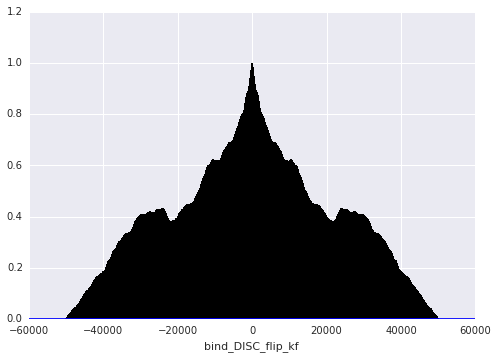

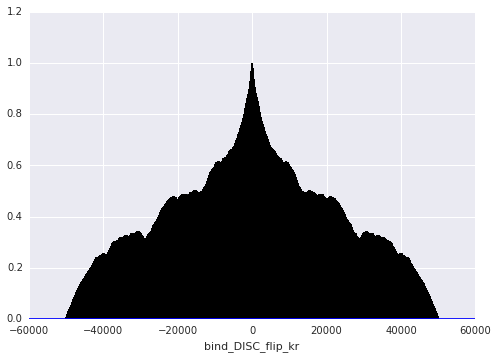

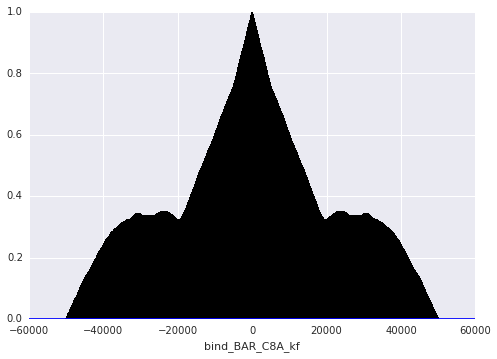

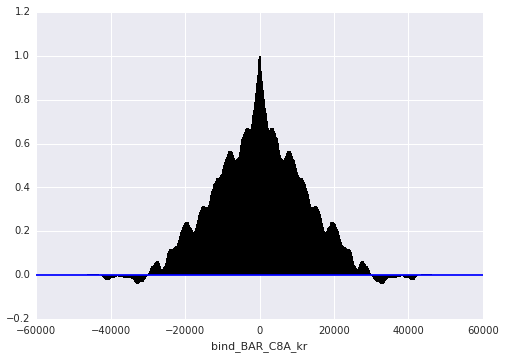

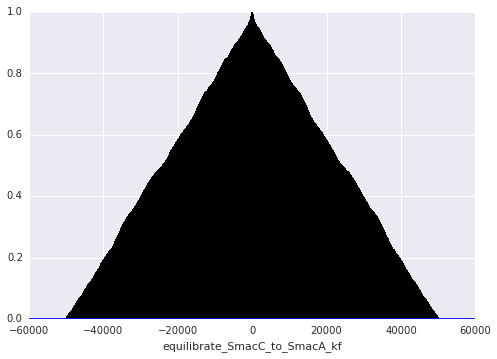

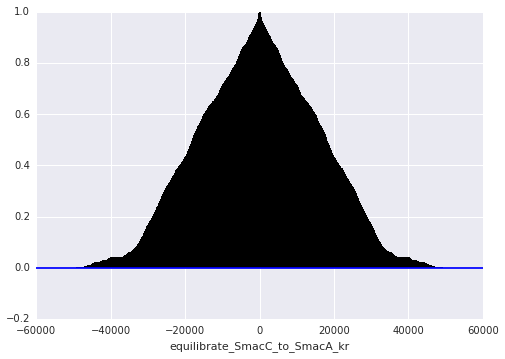

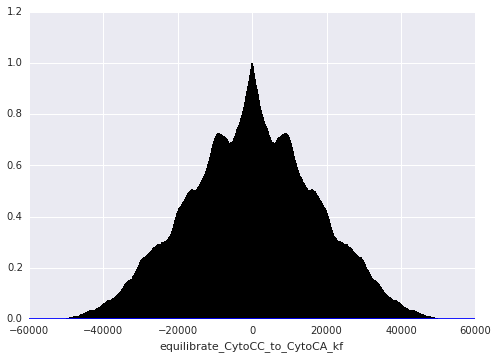

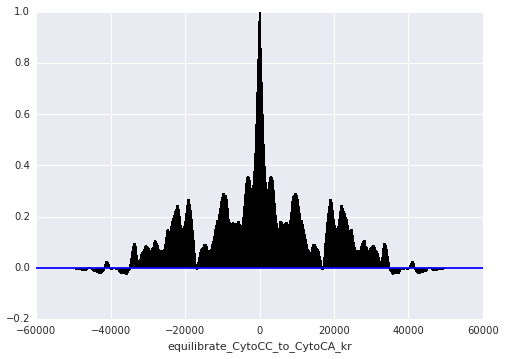

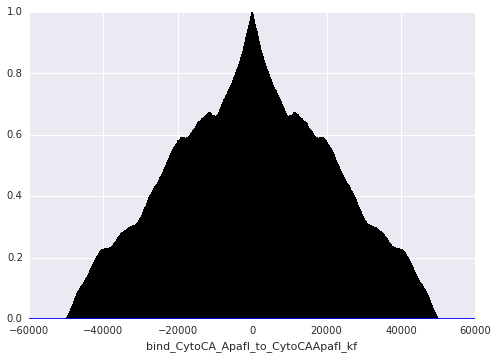

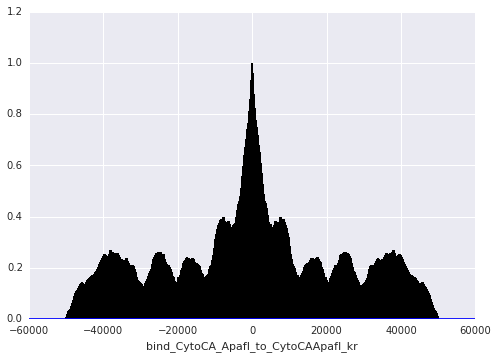

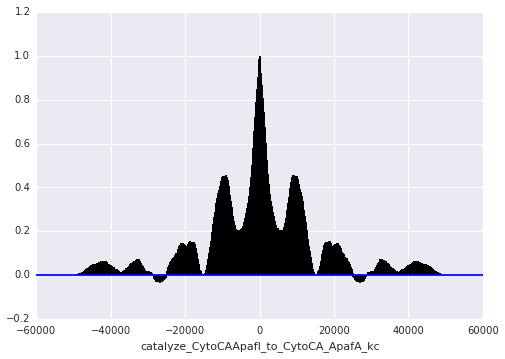

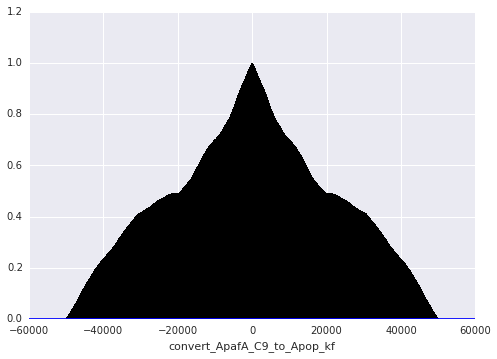

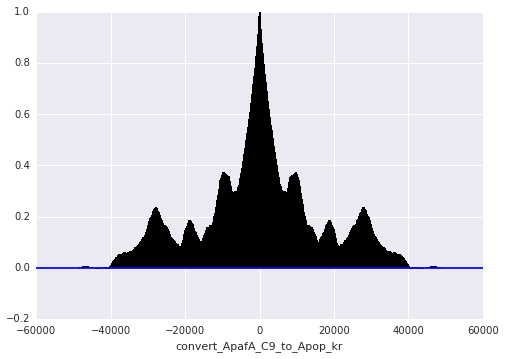

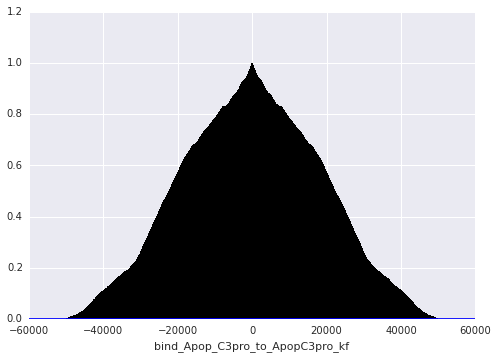

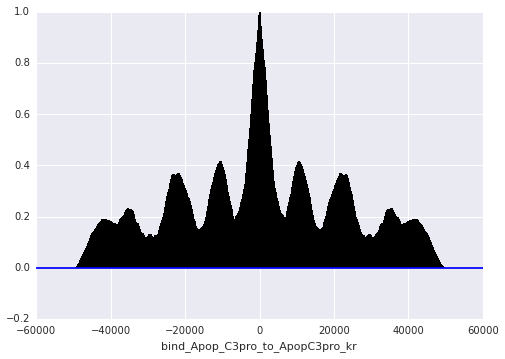

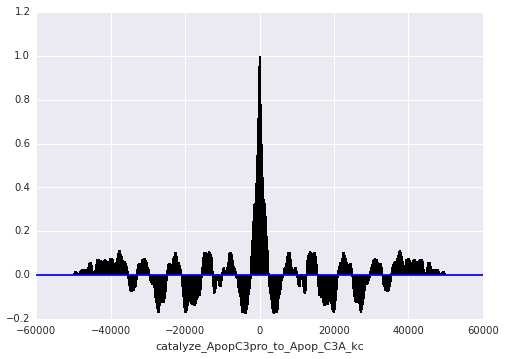

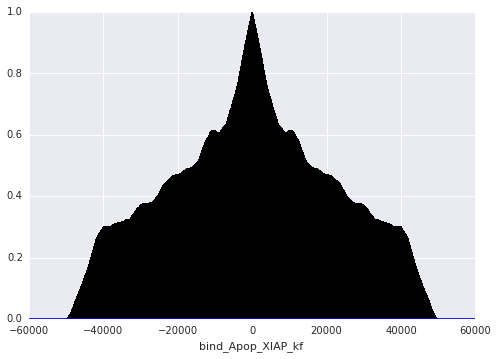

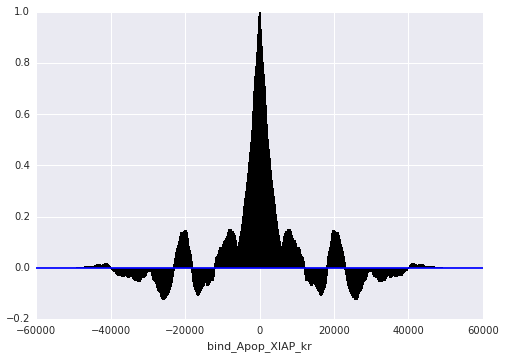

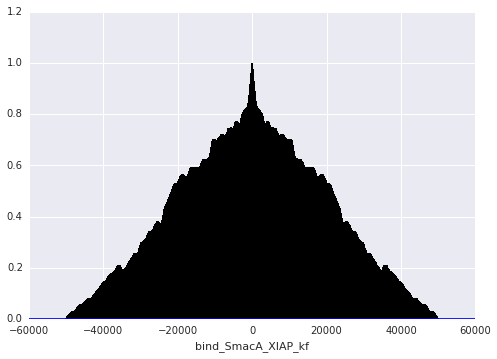

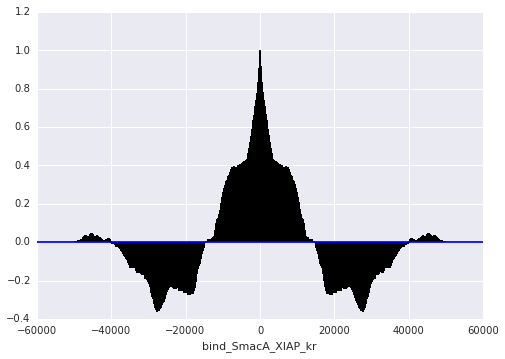

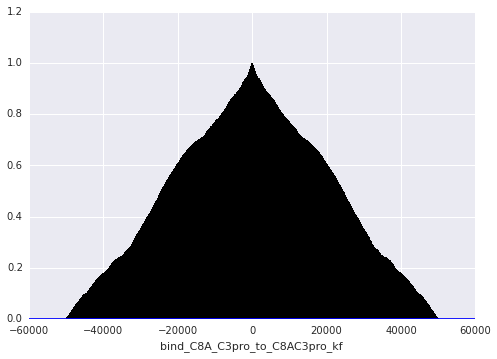

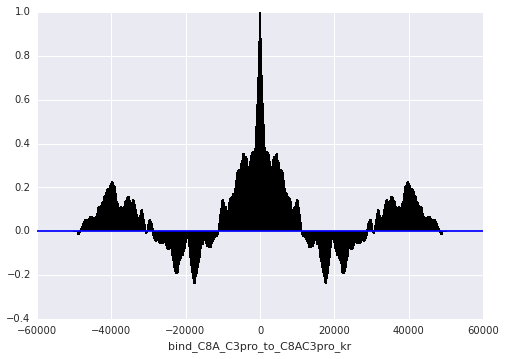

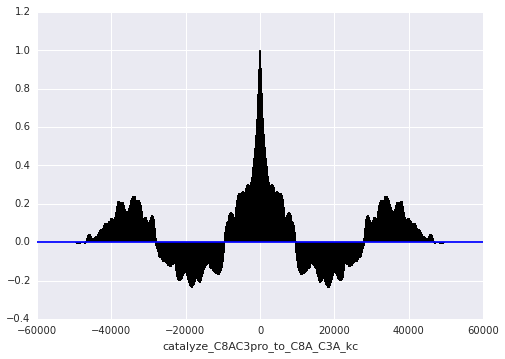

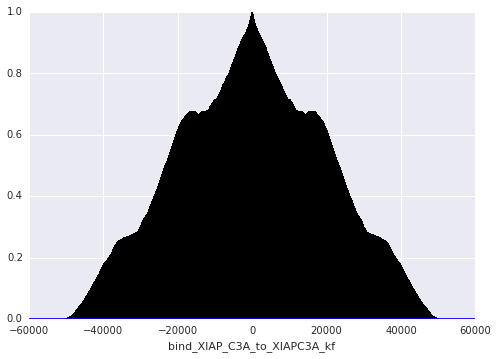

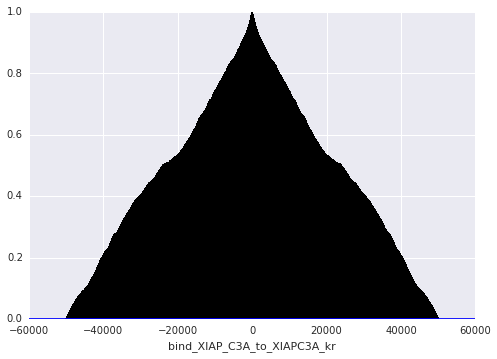

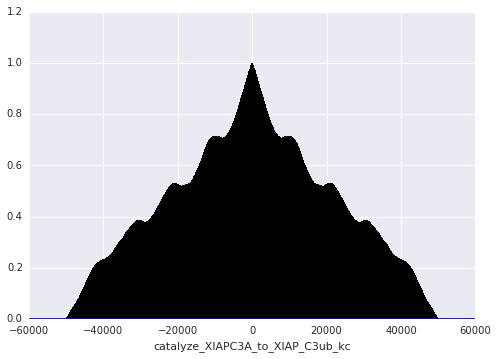

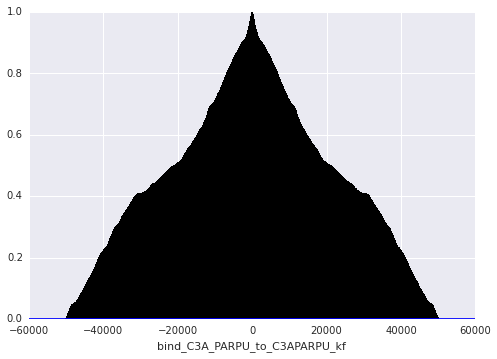

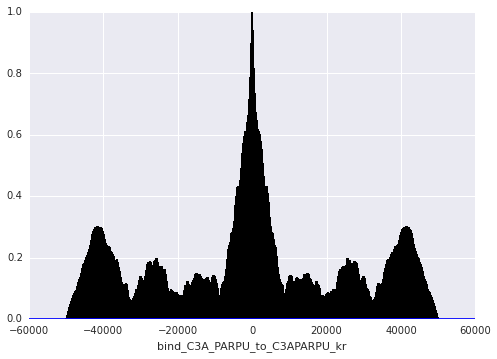

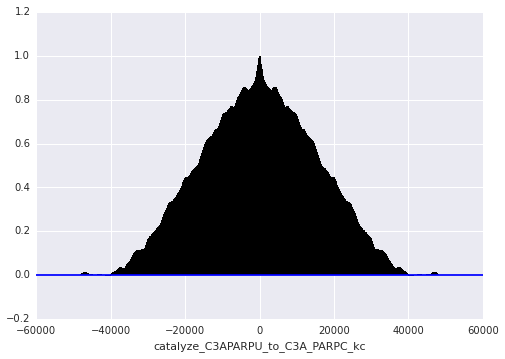

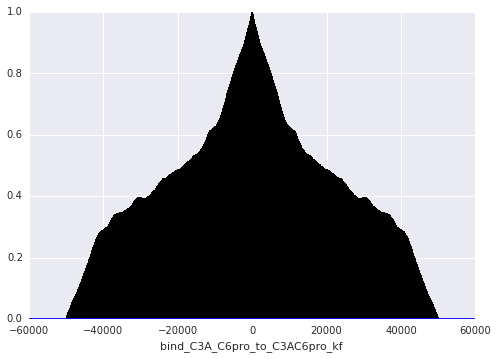

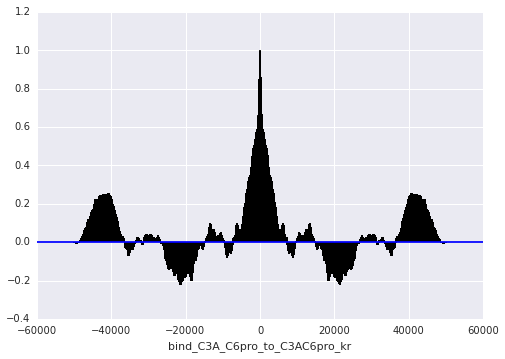

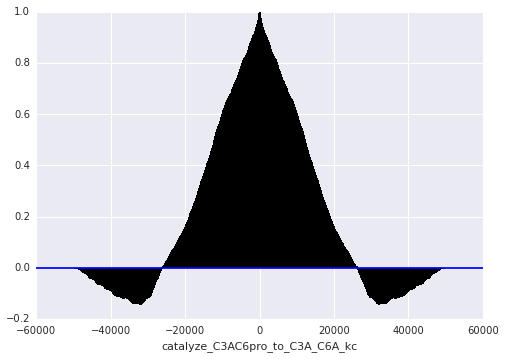

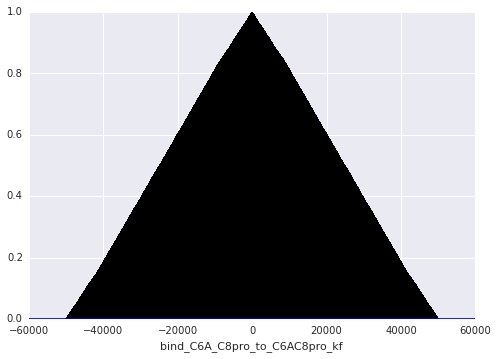

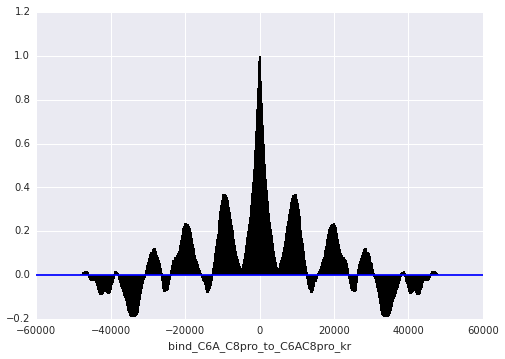

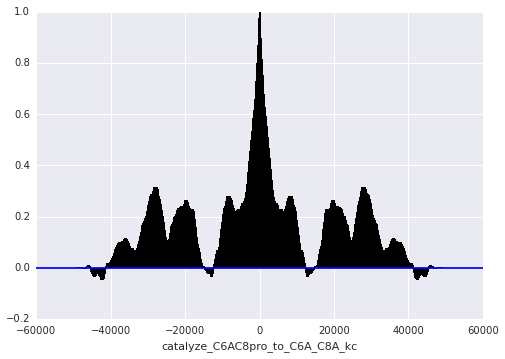

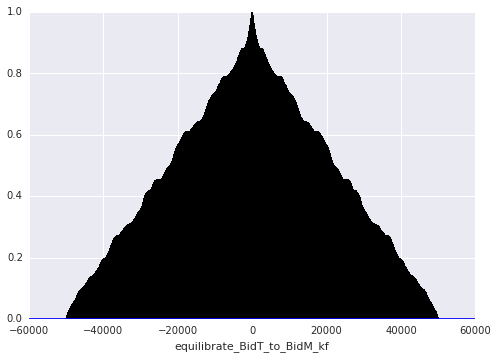

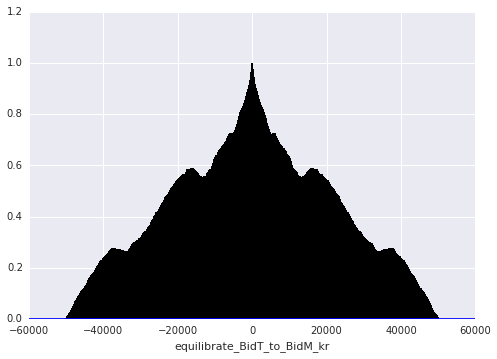

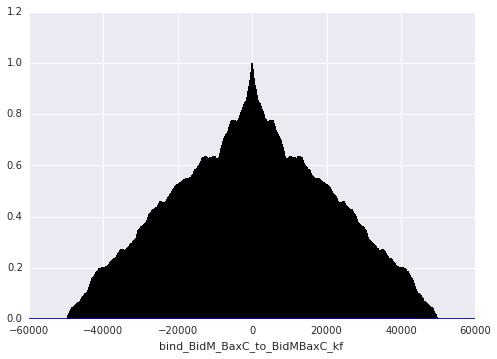

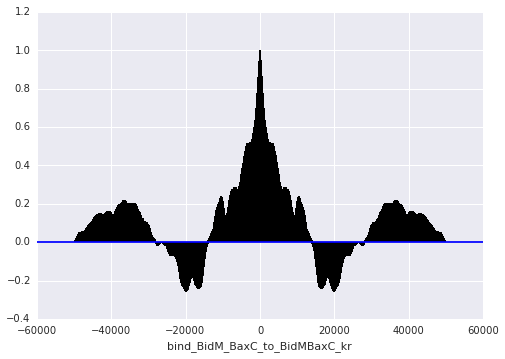

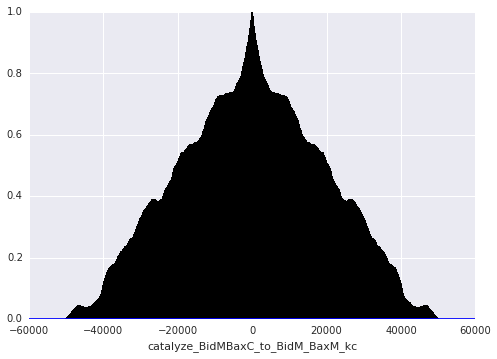

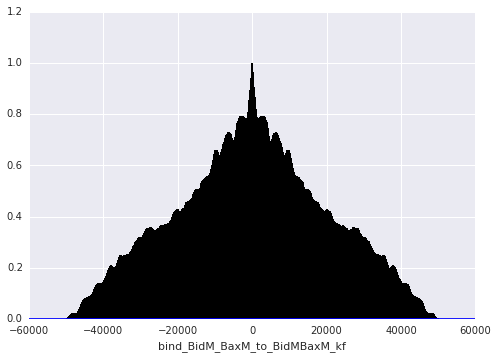

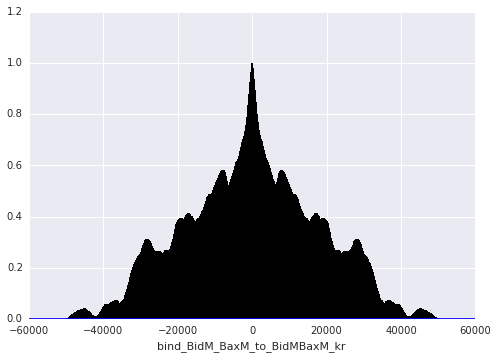

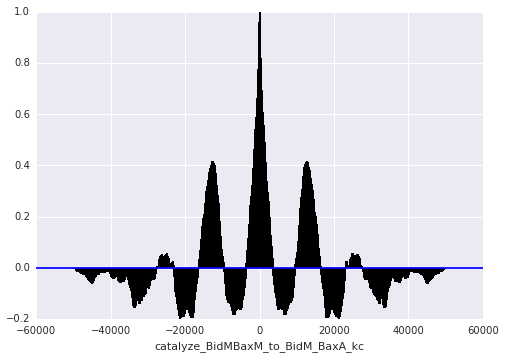

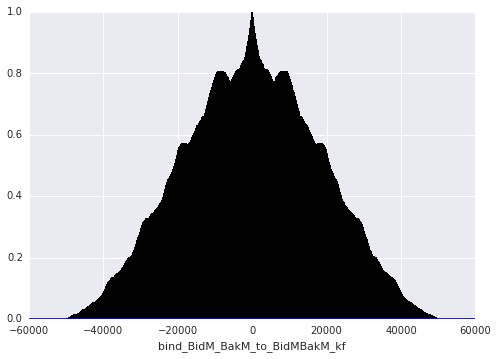

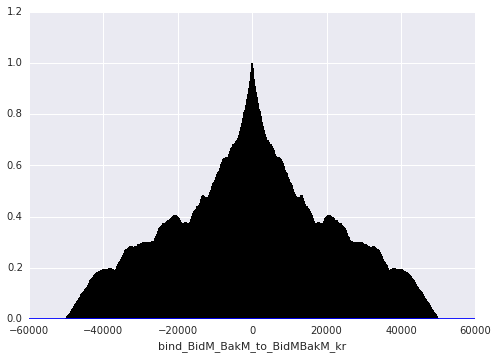

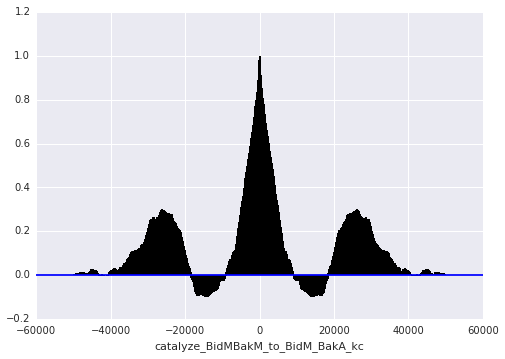

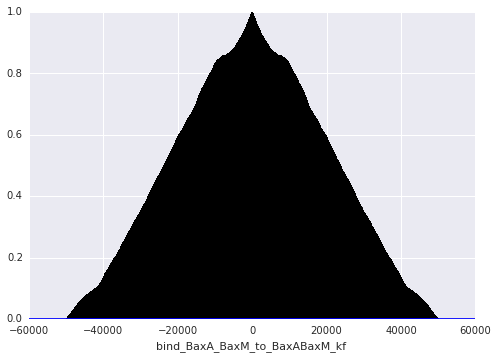

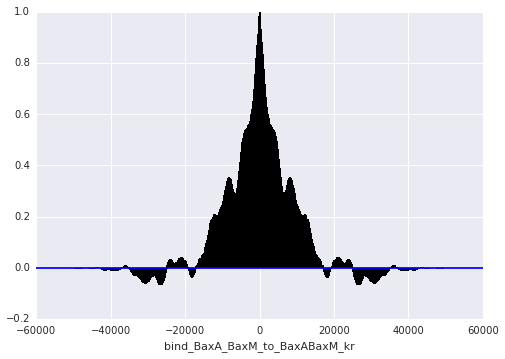

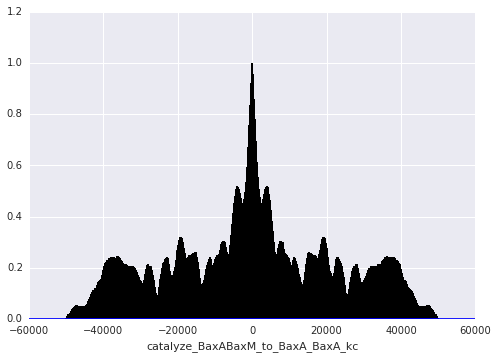

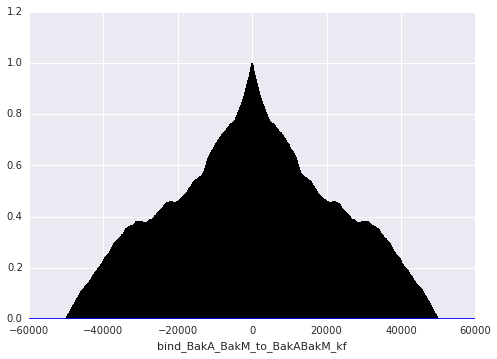

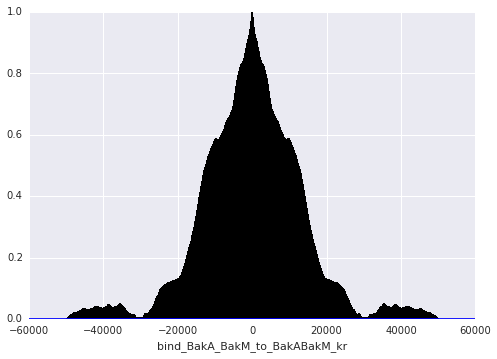

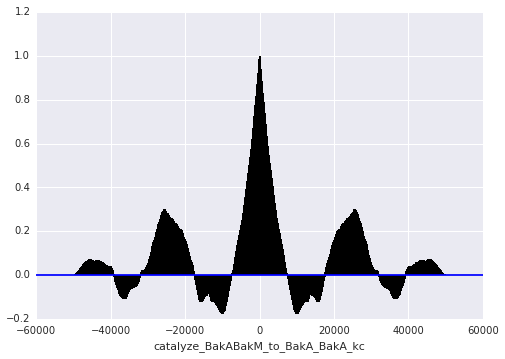

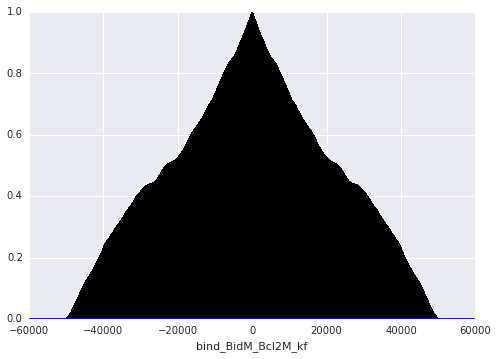

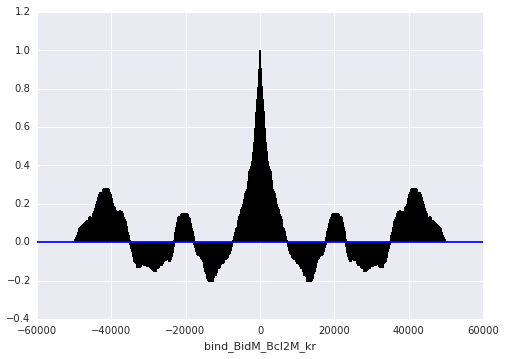

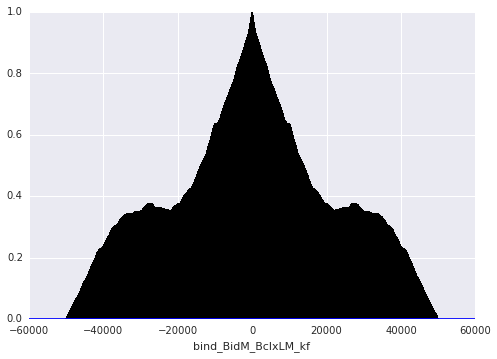

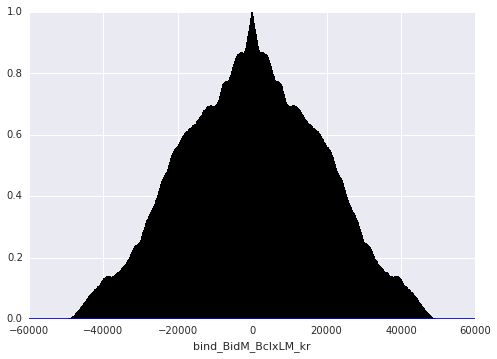

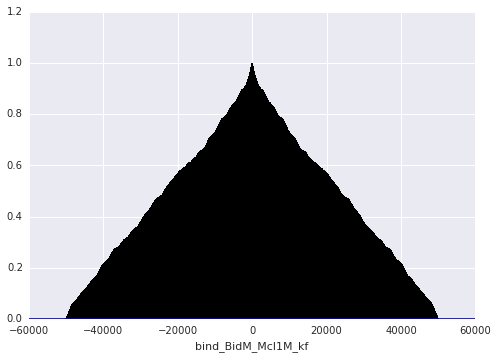

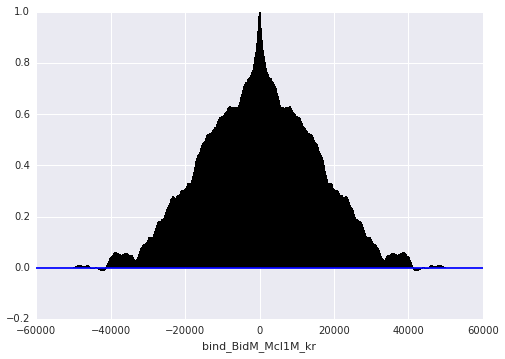

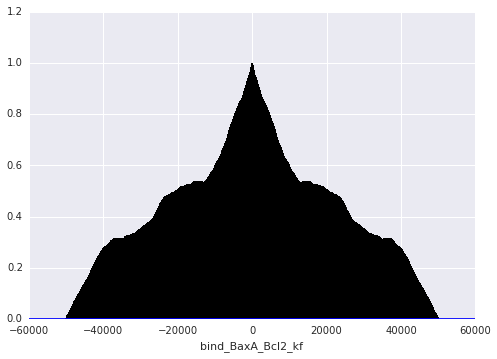

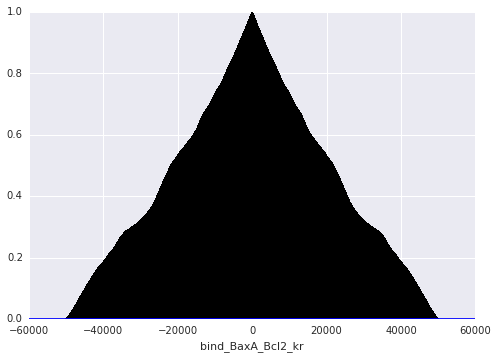

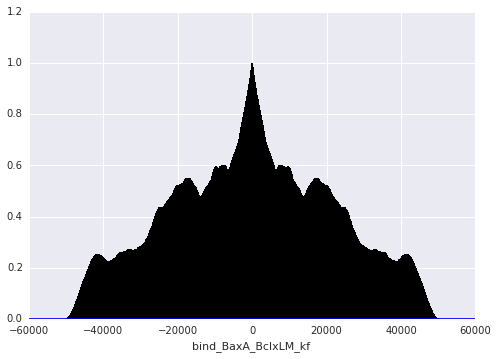

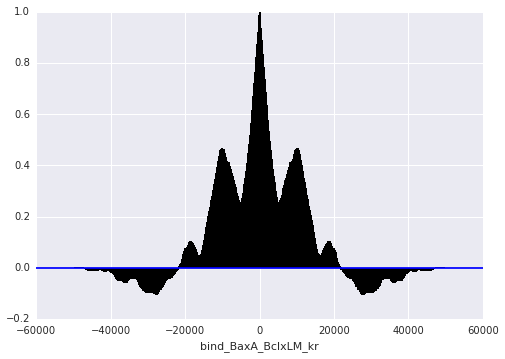

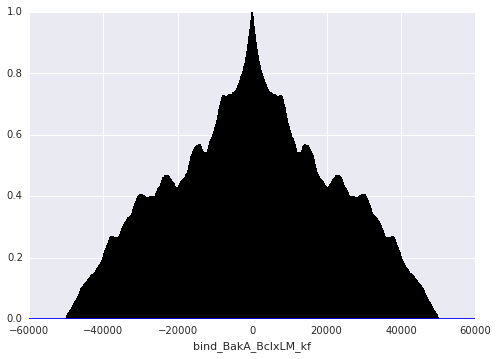

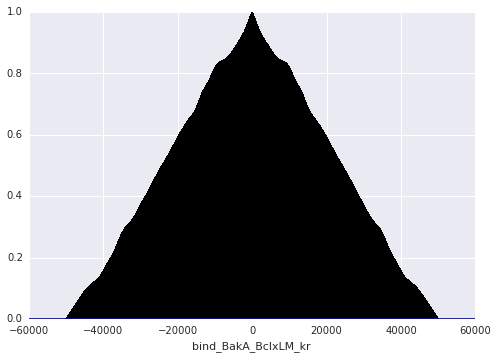

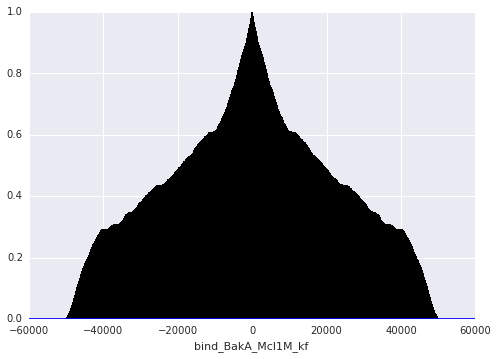

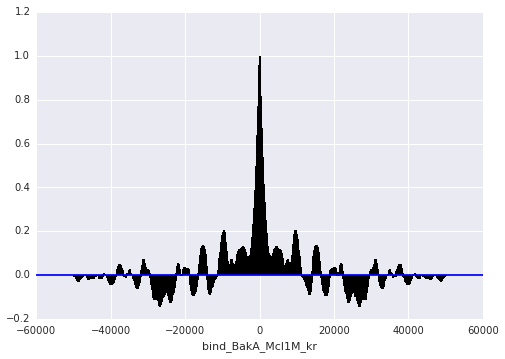

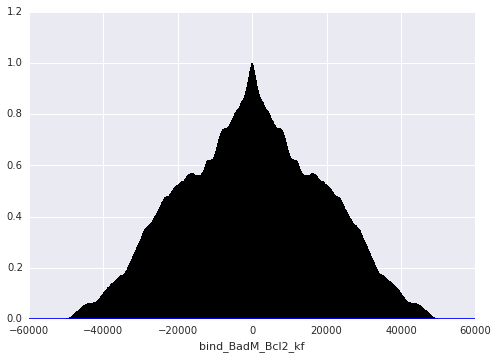

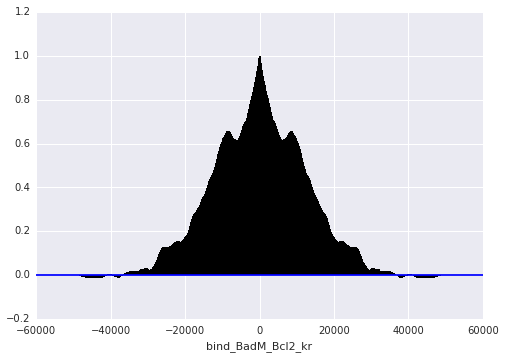

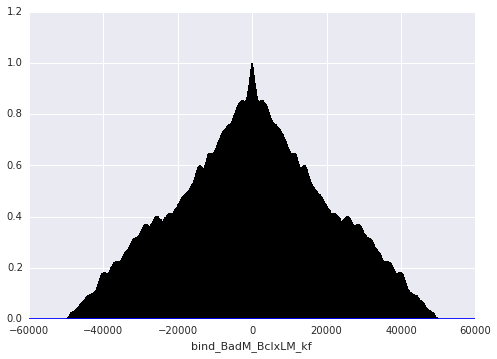

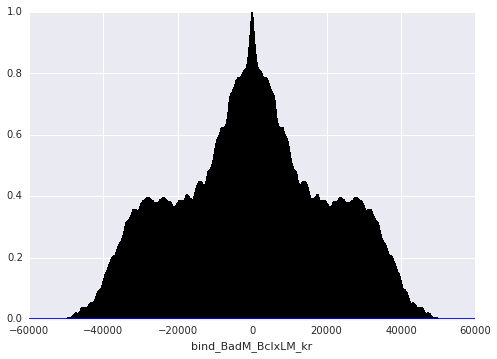

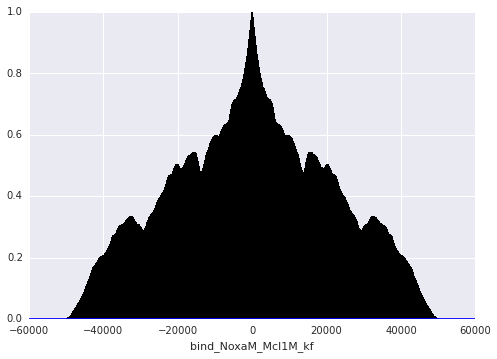

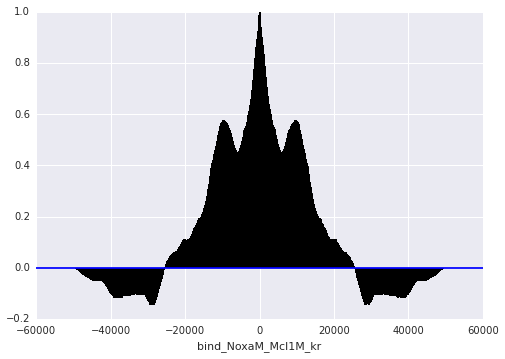

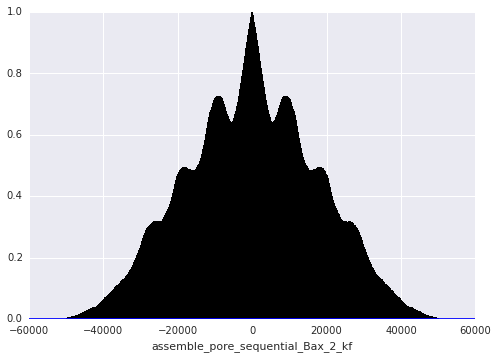

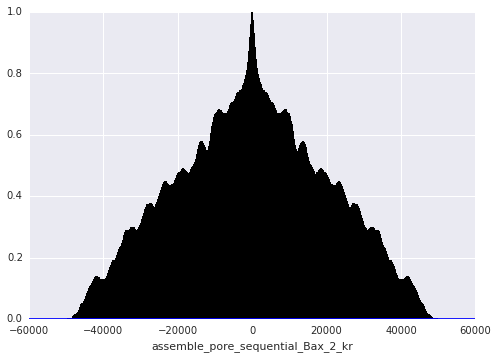

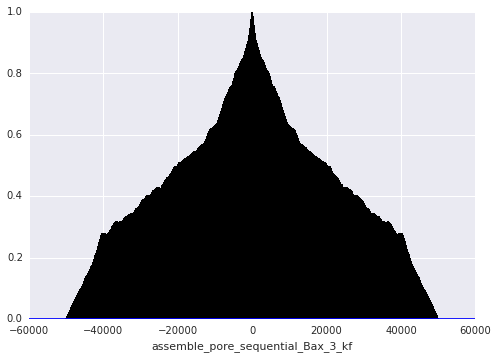

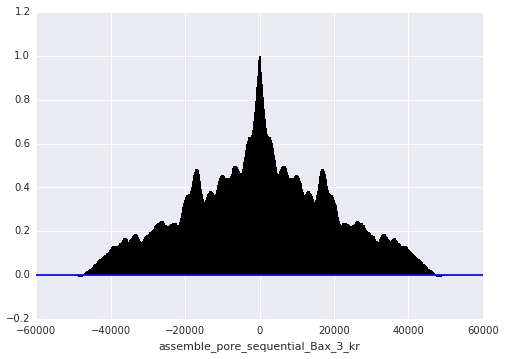

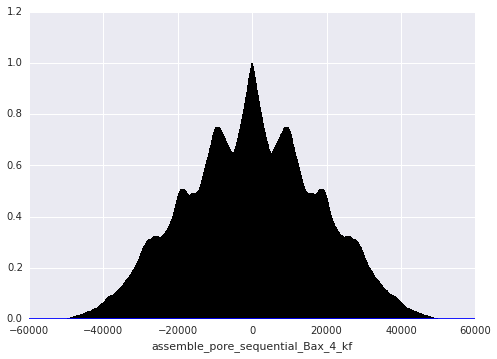

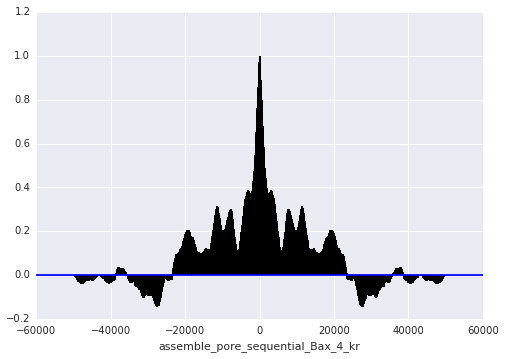

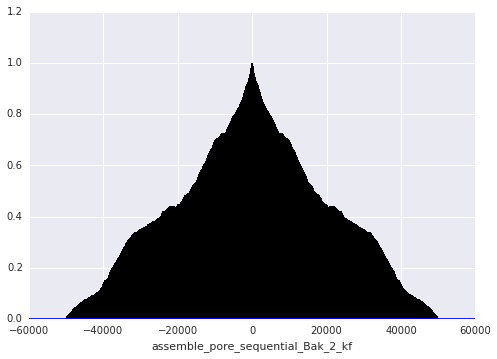

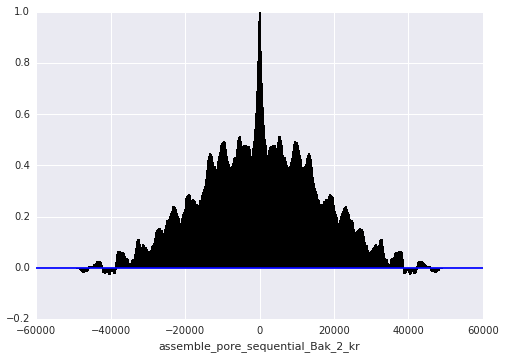

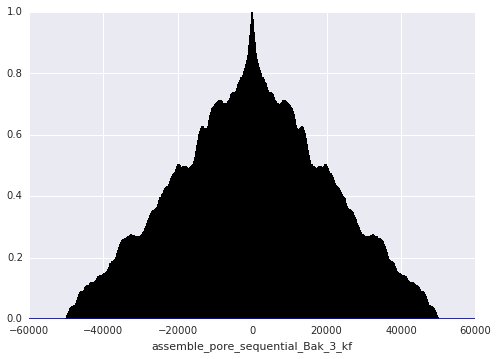

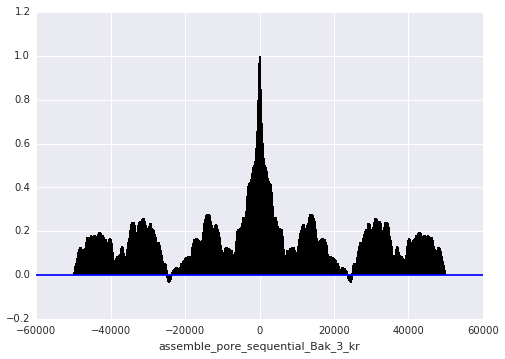

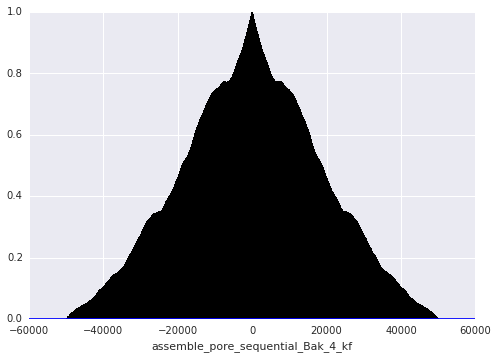

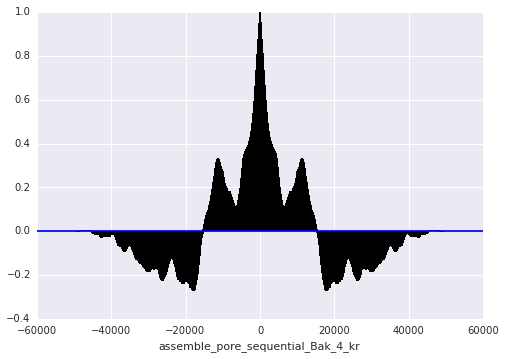

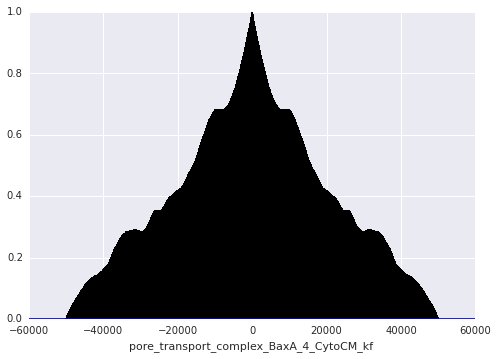

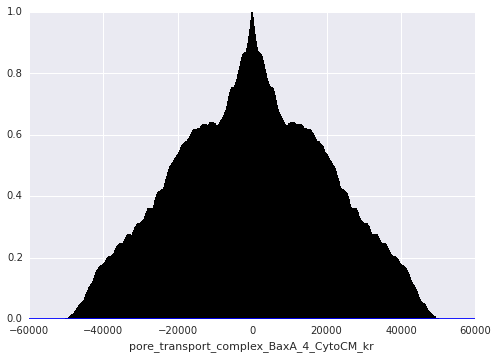

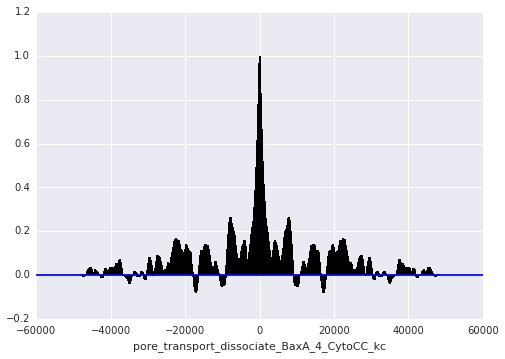

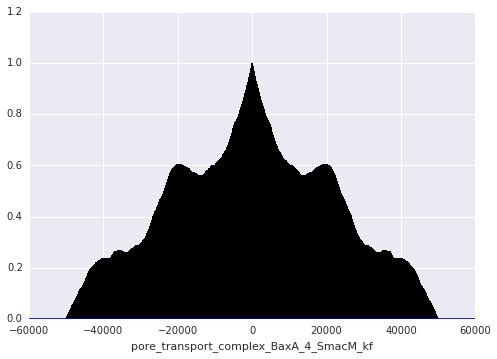

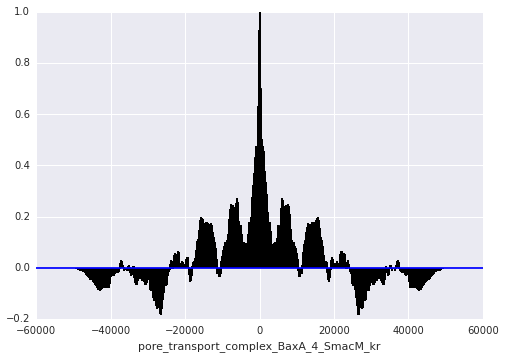

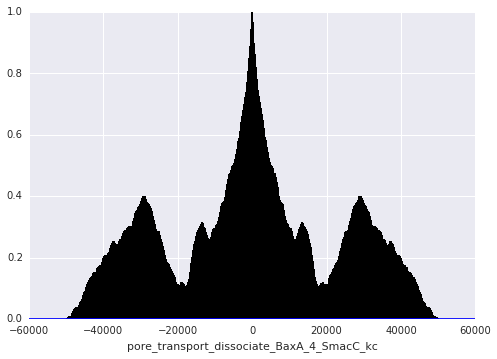

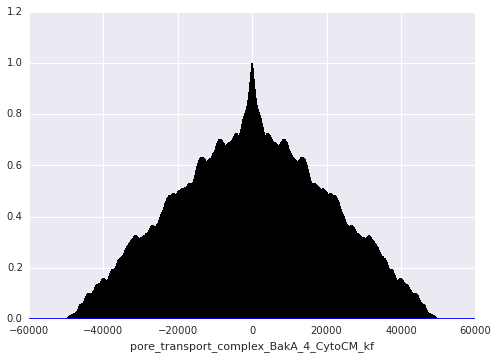

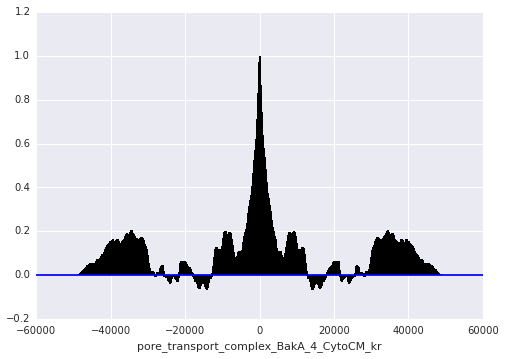

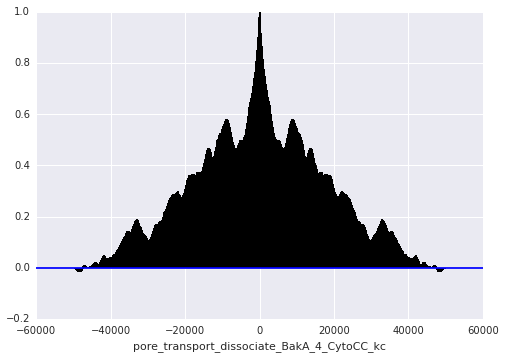

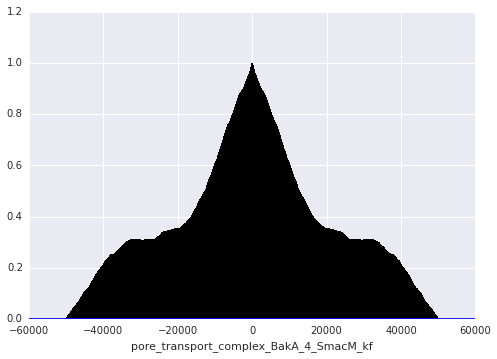

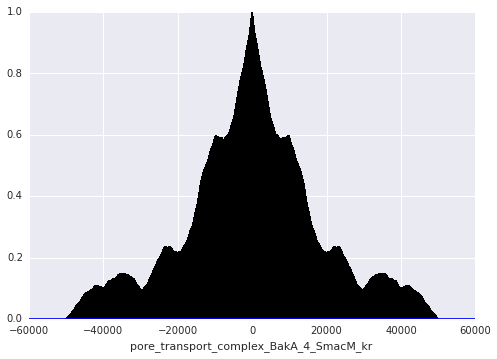

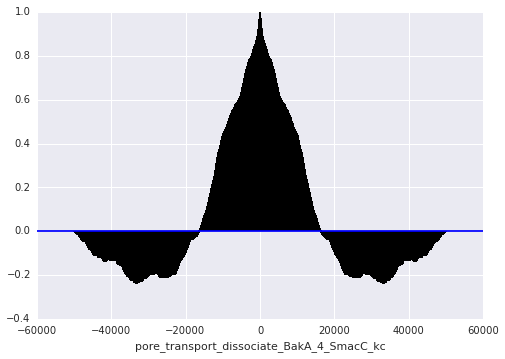

In [37]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

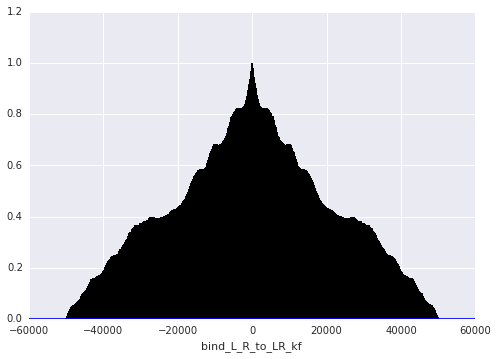

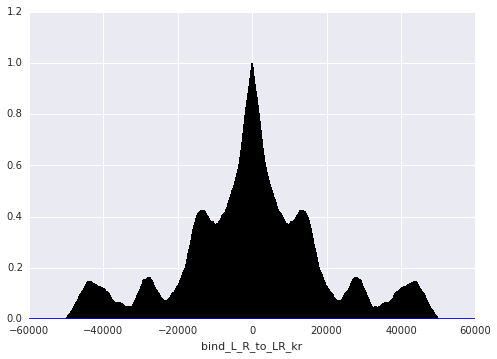

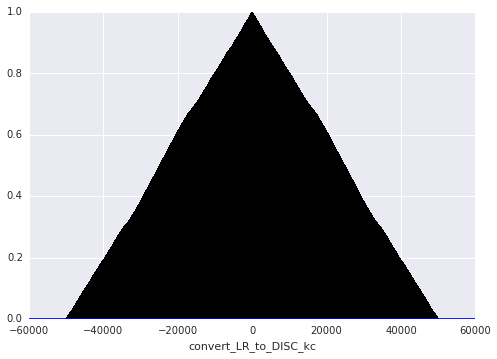

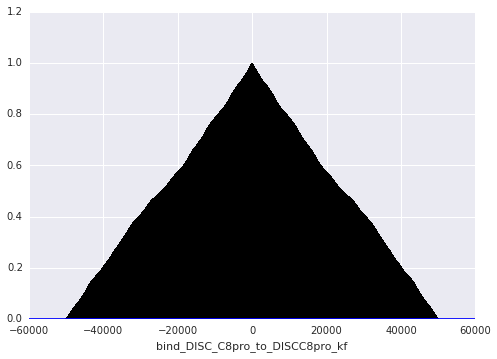

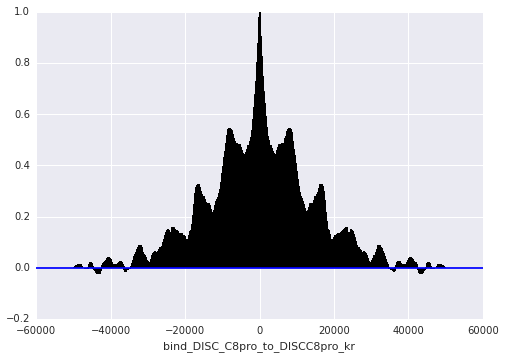

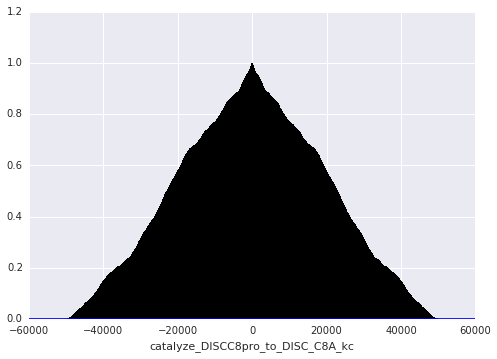

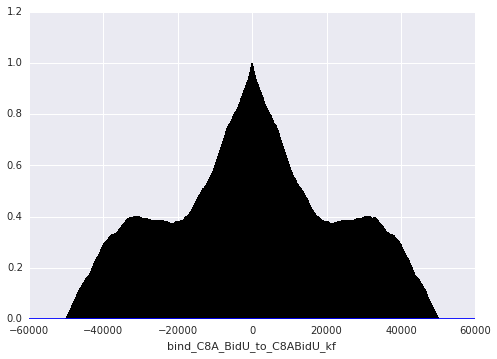

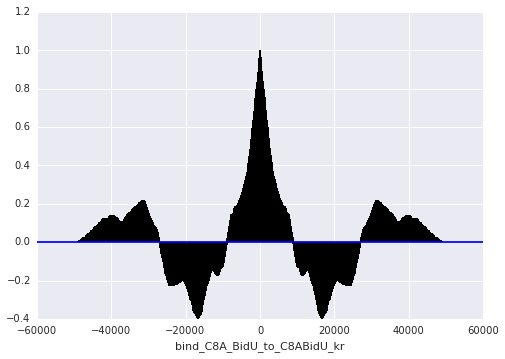

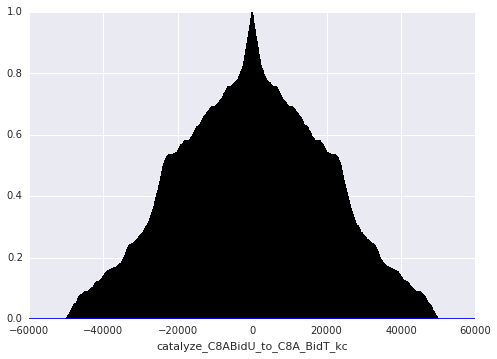

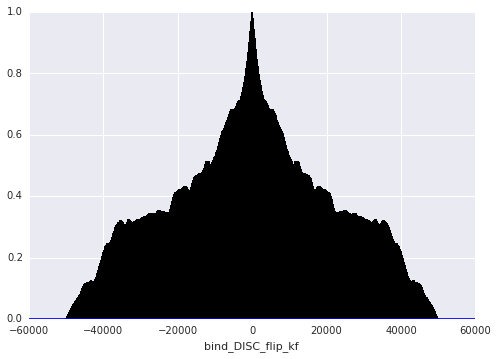

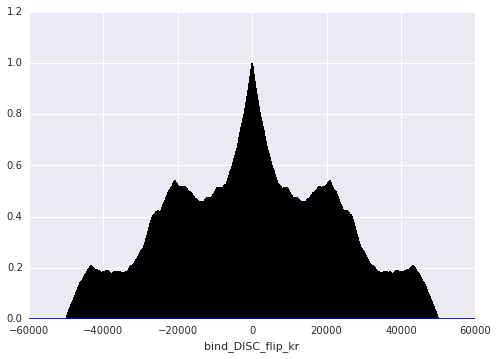

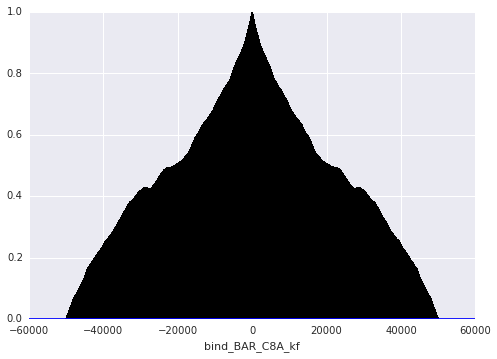

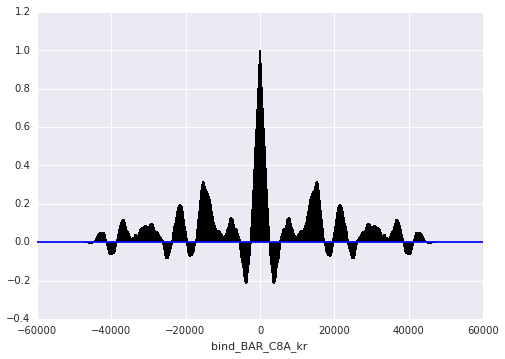

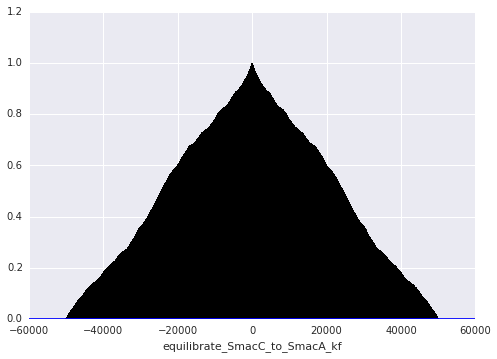

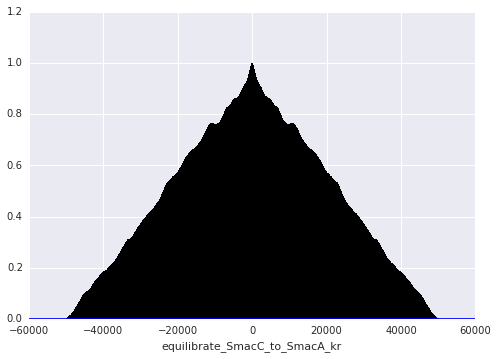

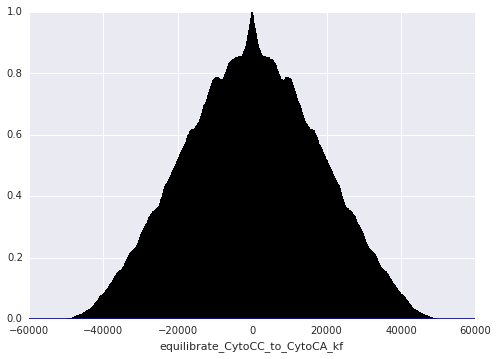

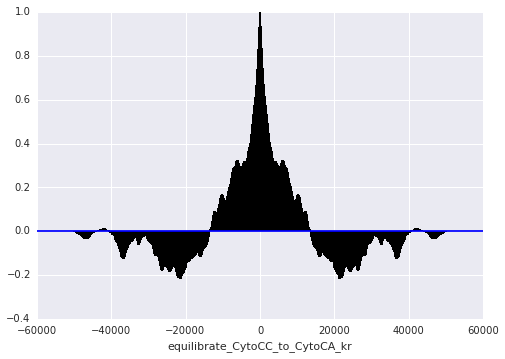

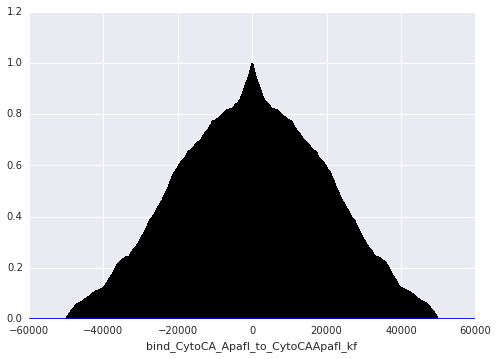

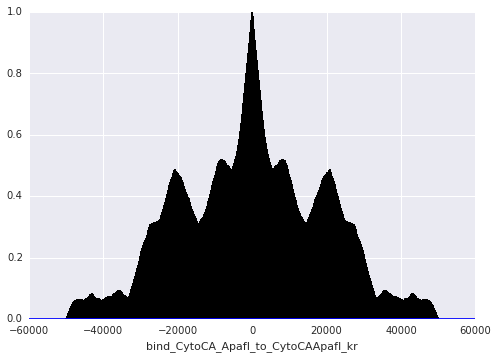

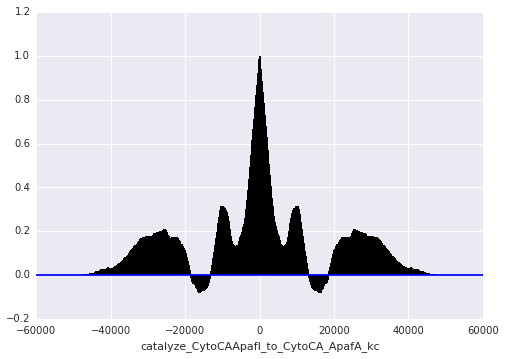

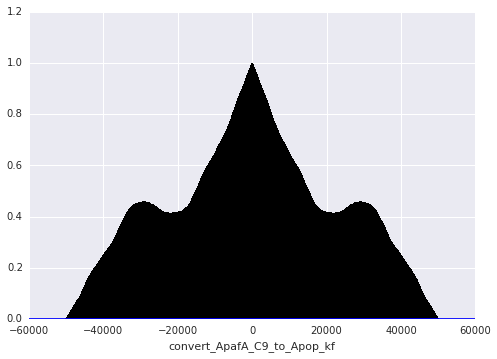

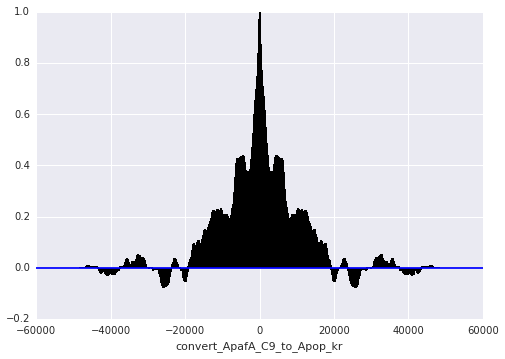

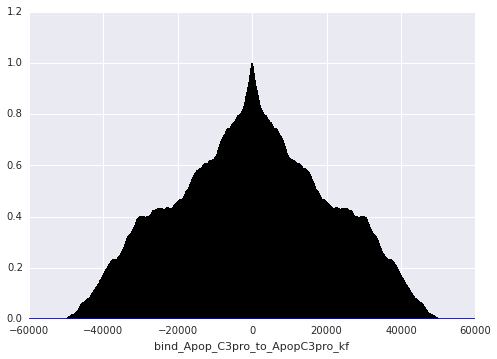

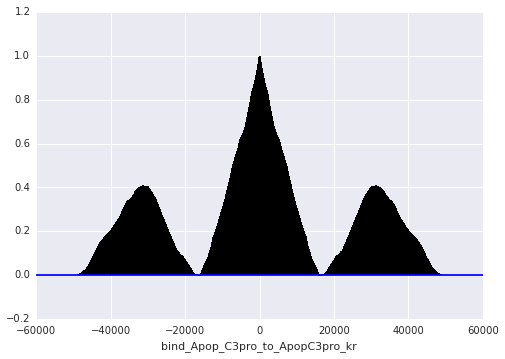

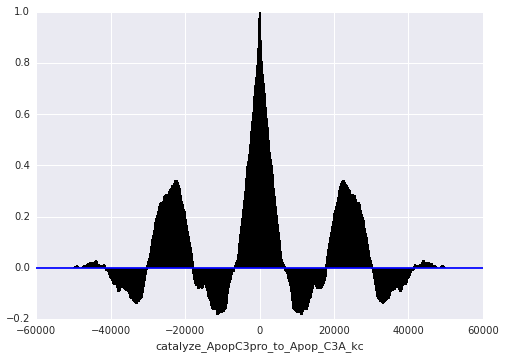

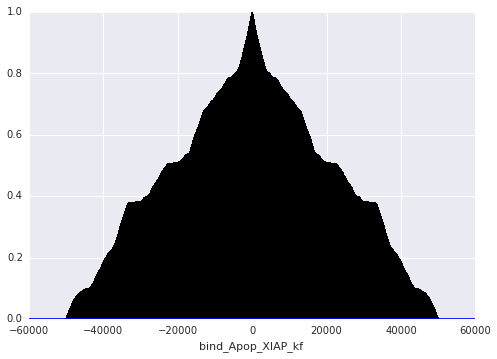

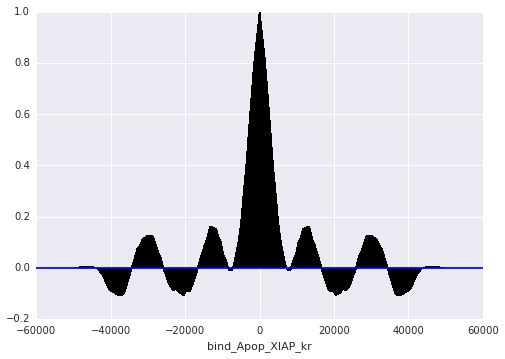

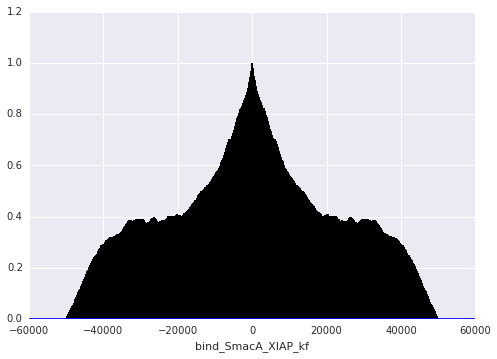

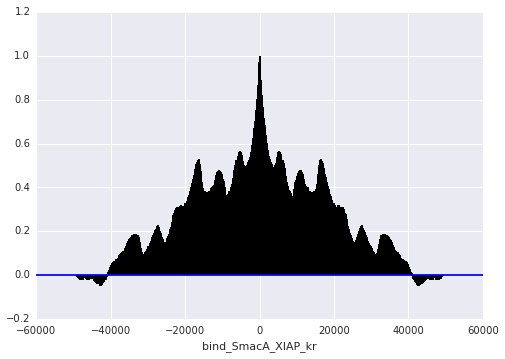

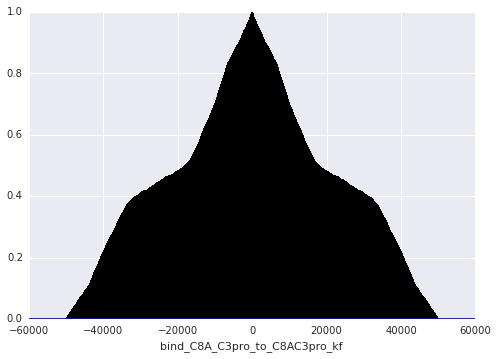

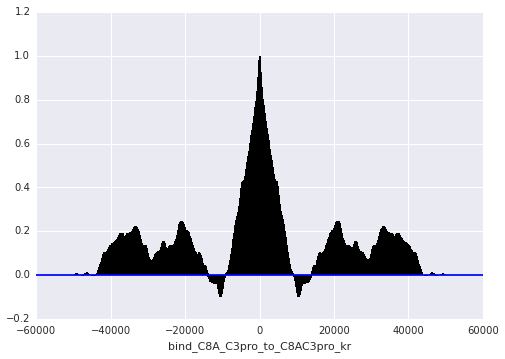

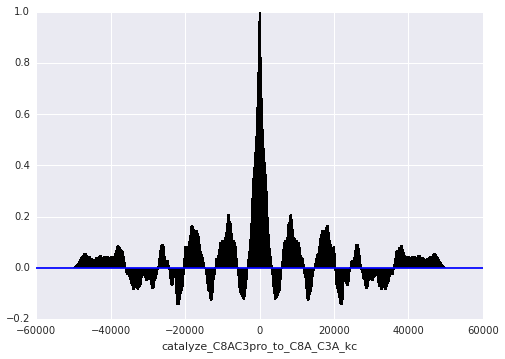

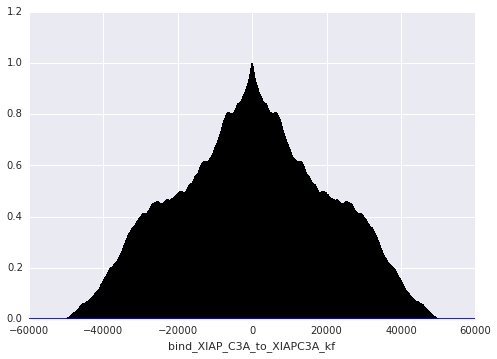

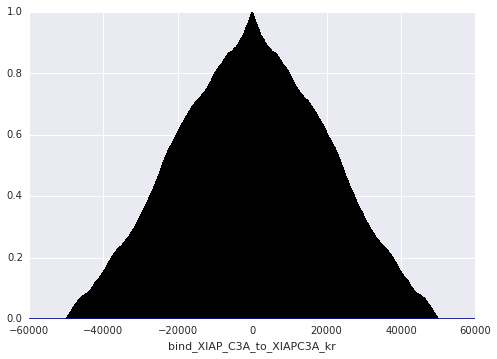

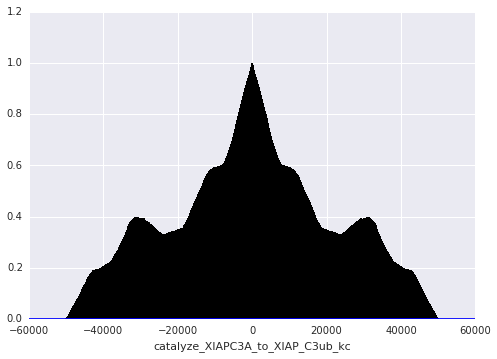

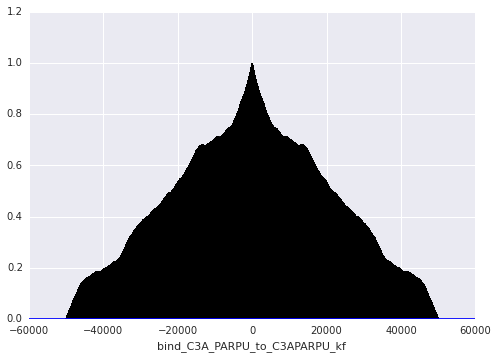

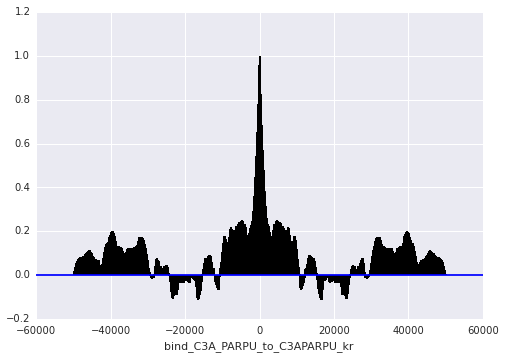

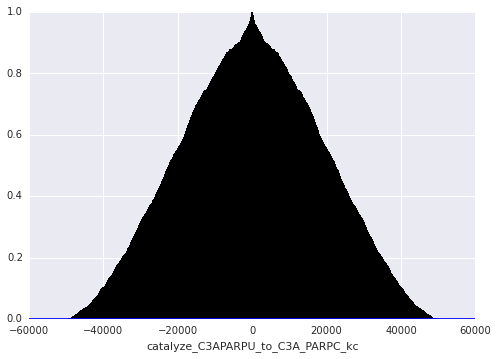

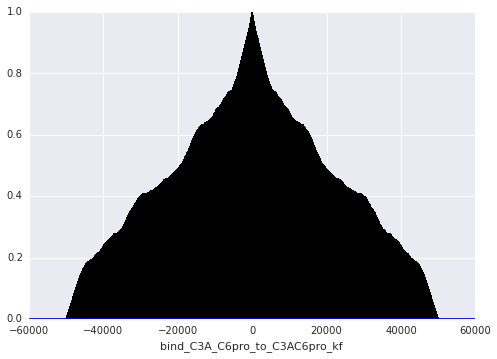

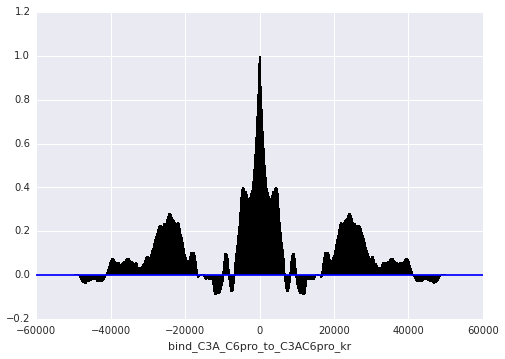

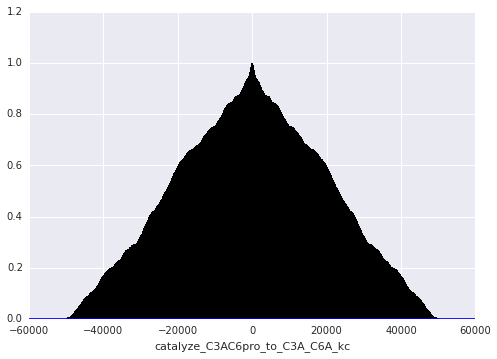

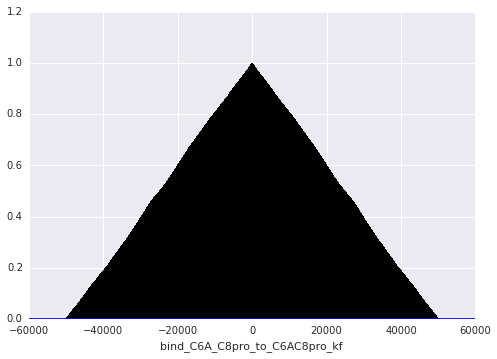

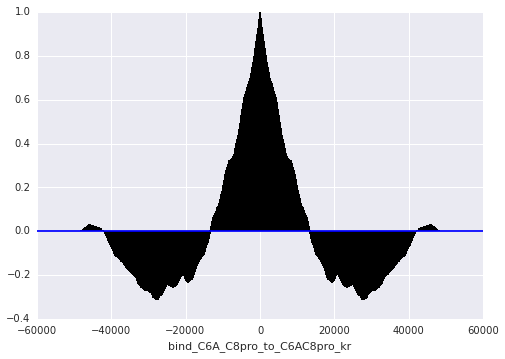

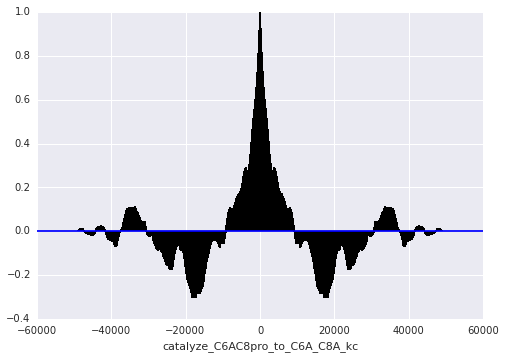

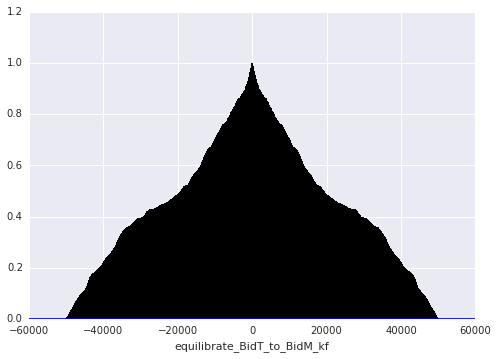

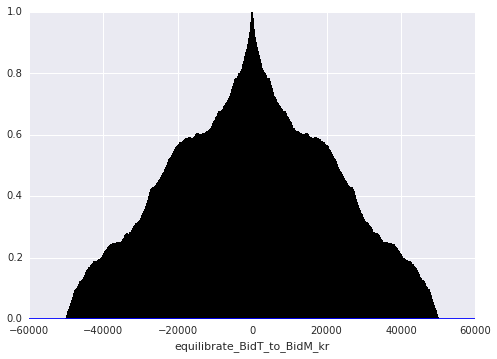

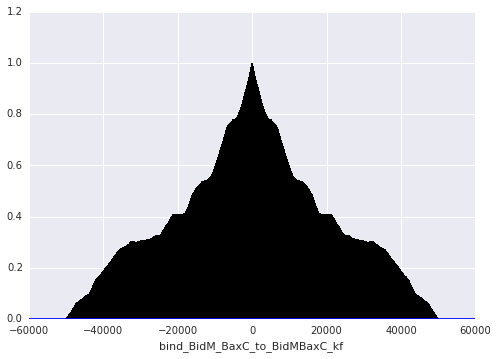

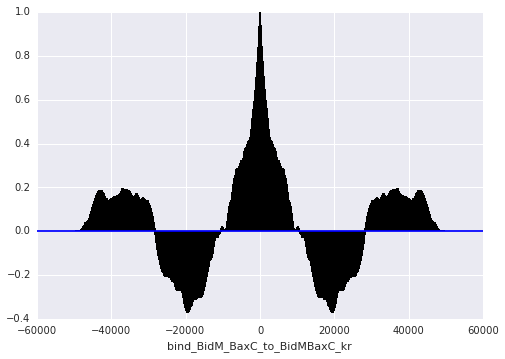

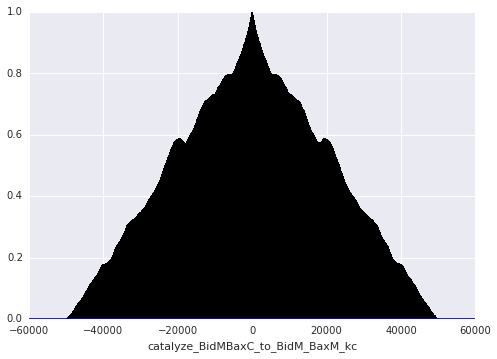

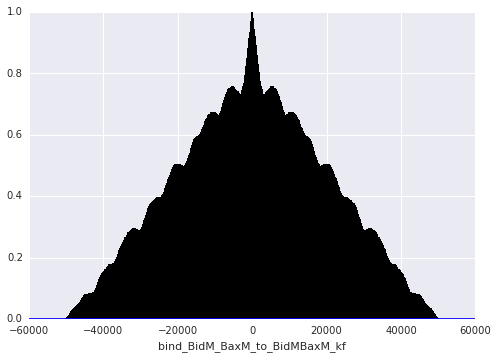

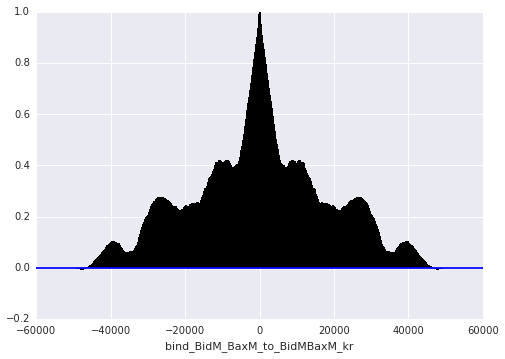

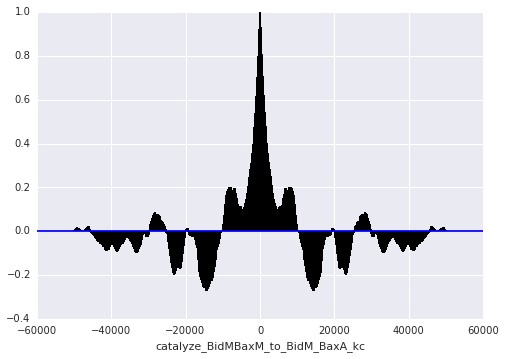

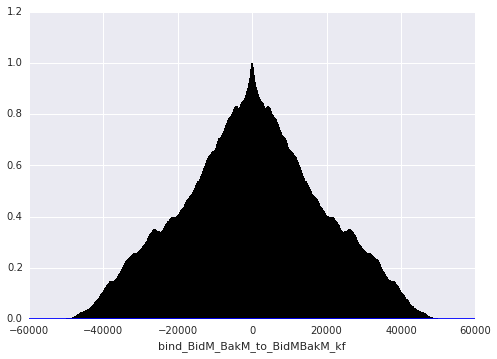

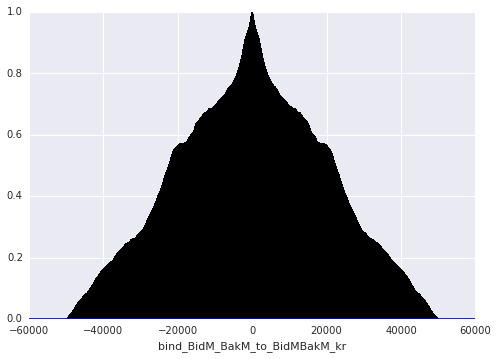

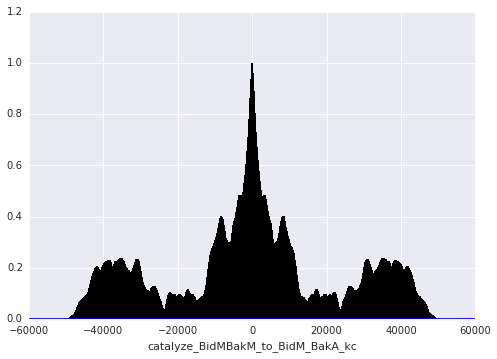

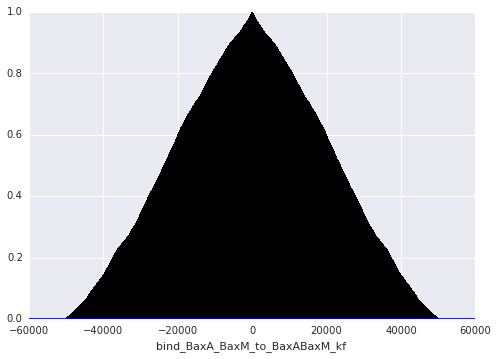

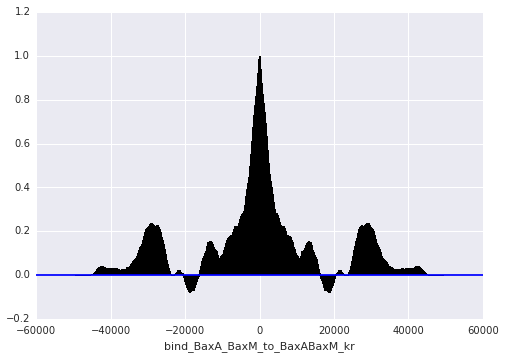

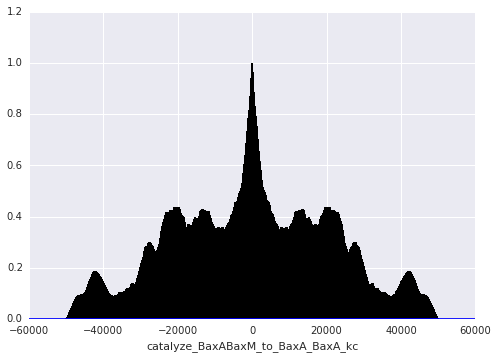

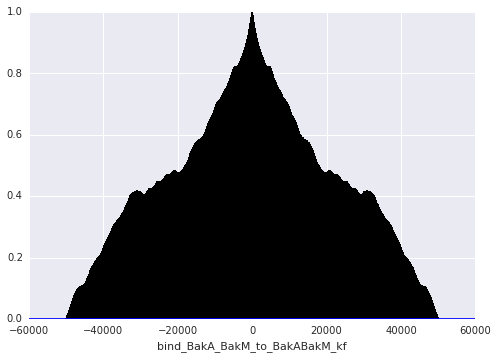

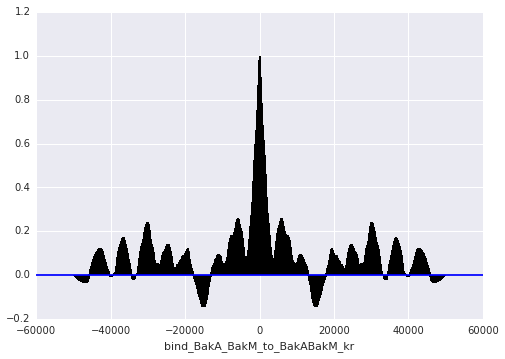

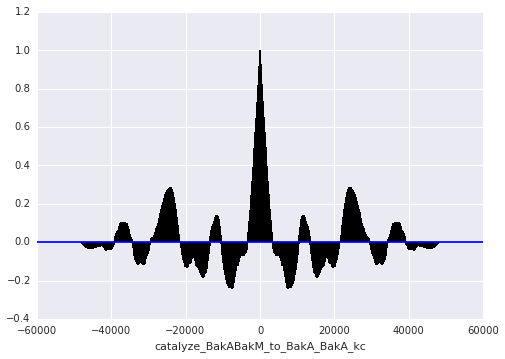

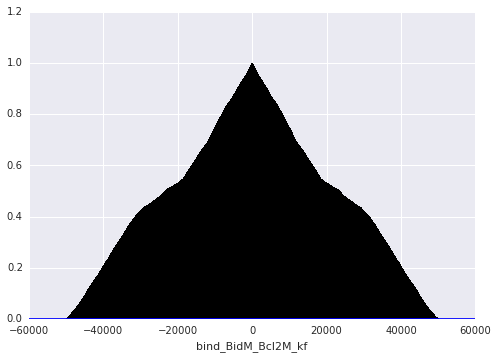

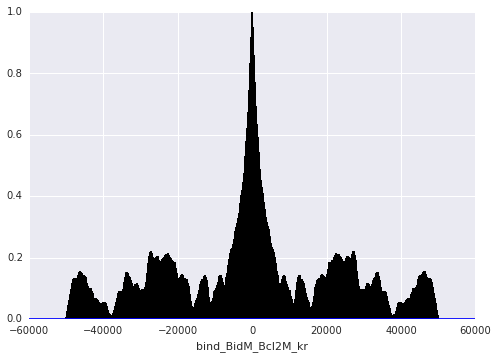

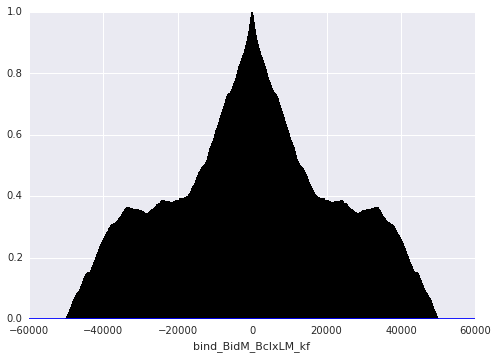

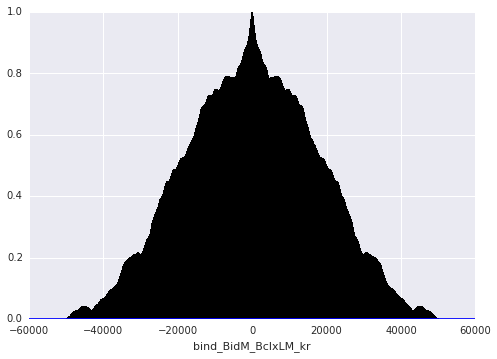

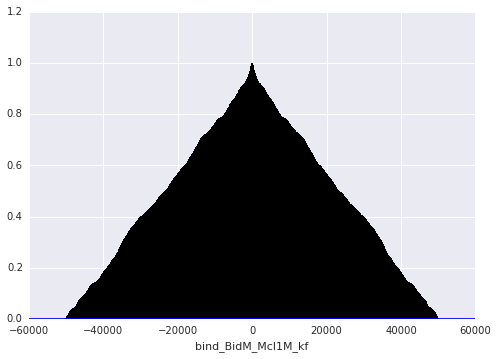

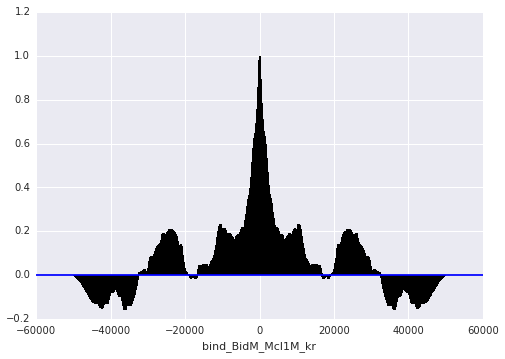

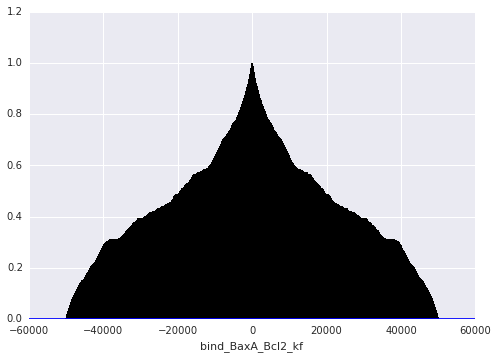

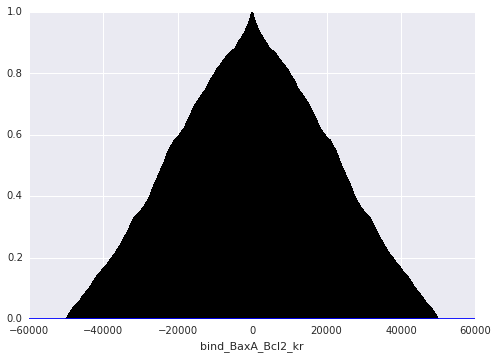

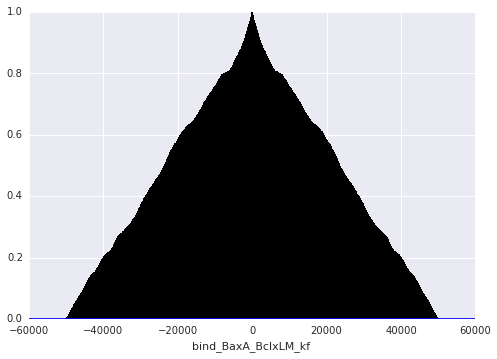

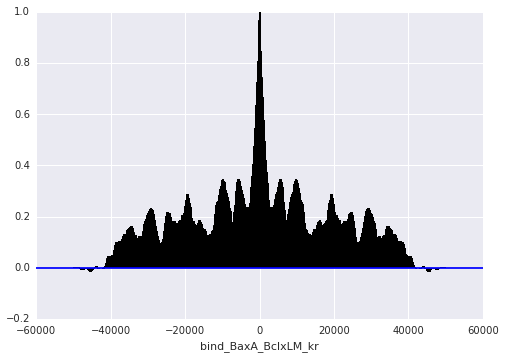

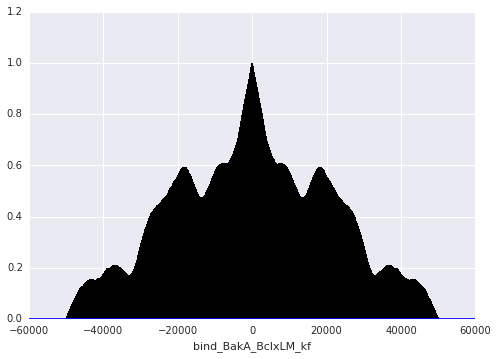

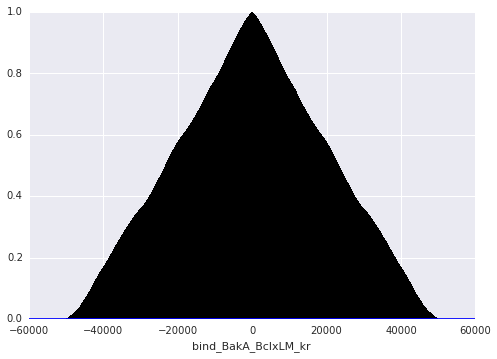

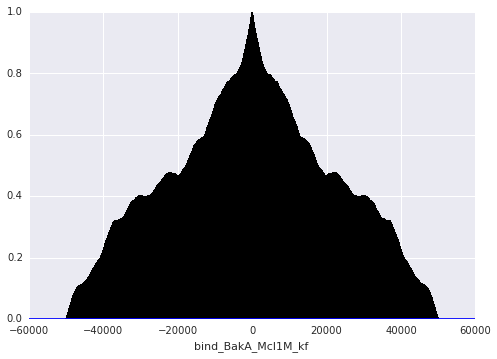

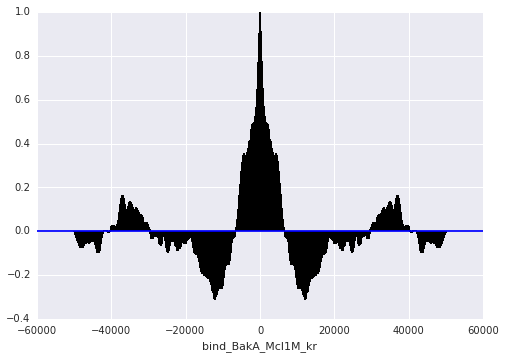

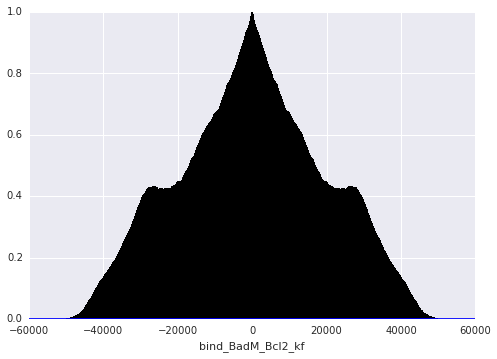

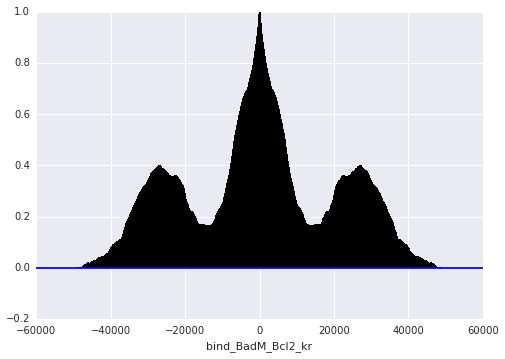

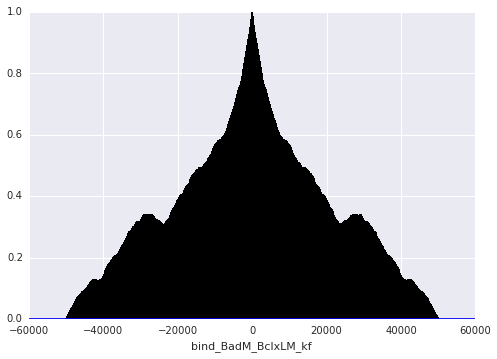

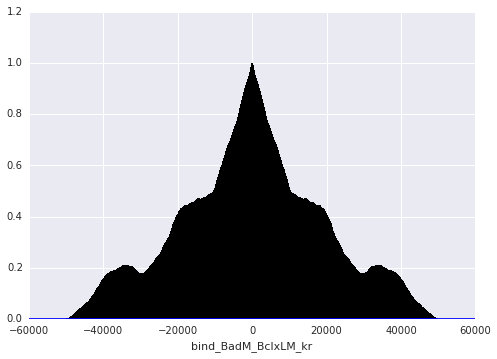

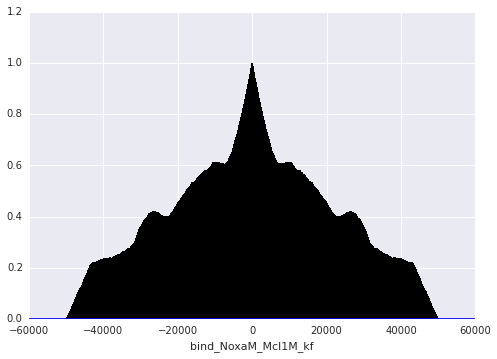

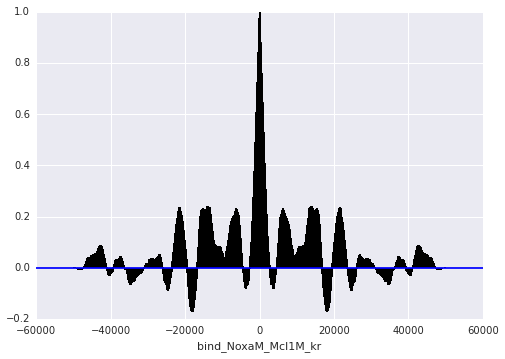

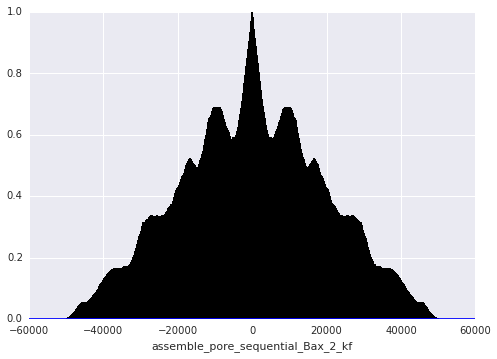

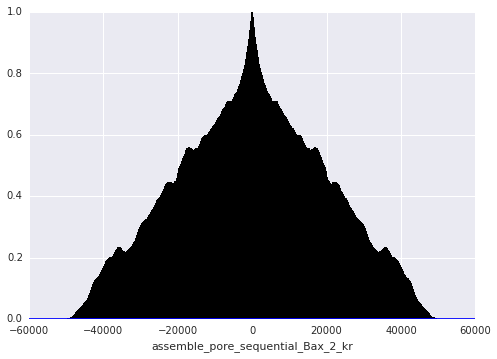

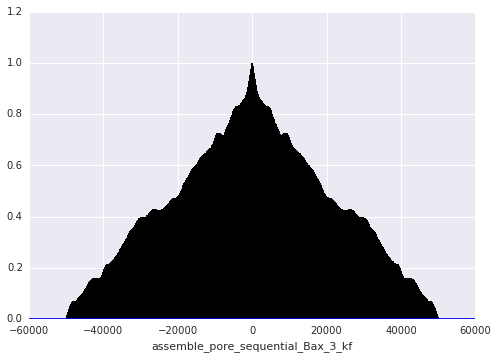

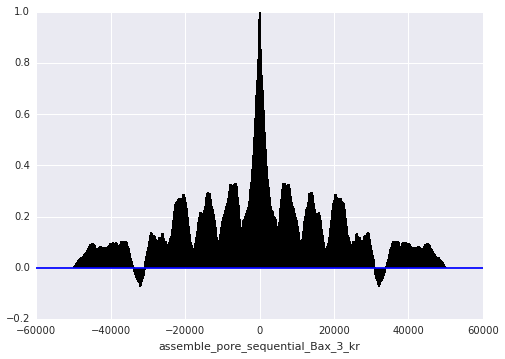

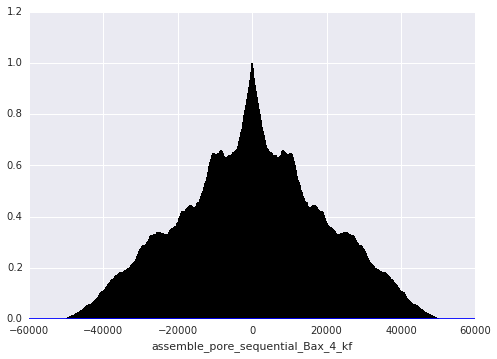

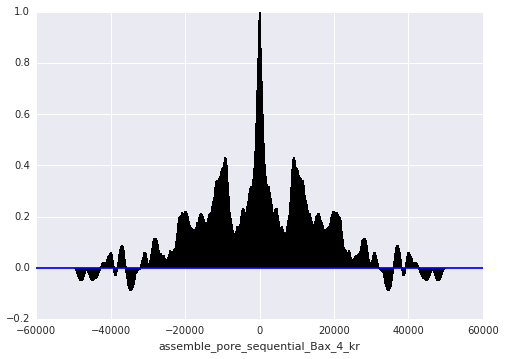

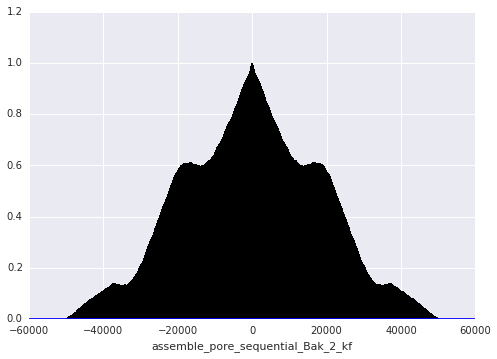

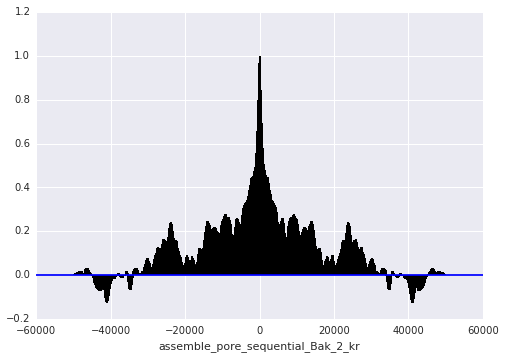

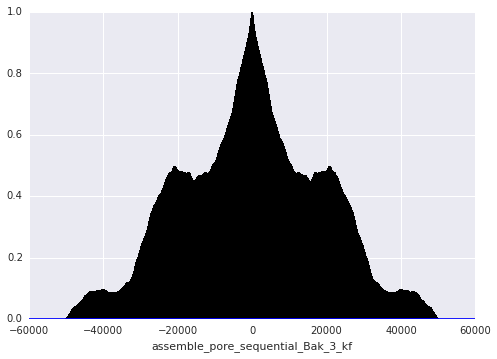

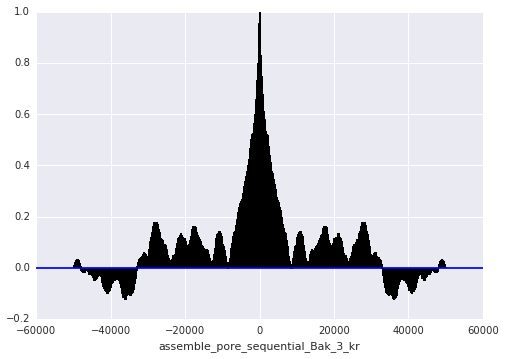

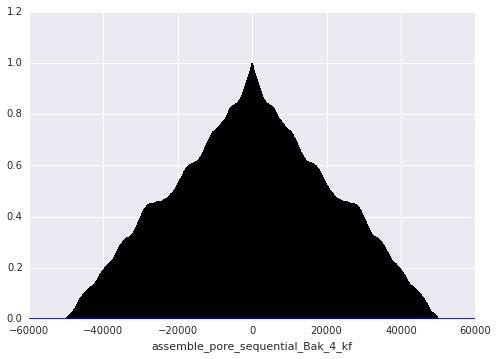

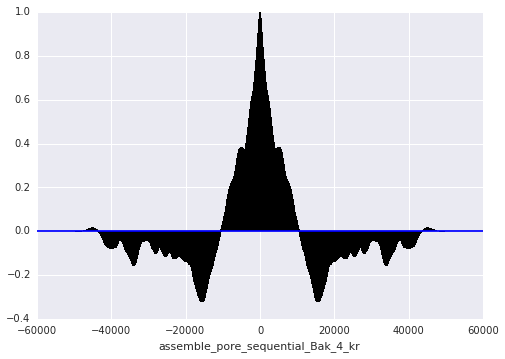

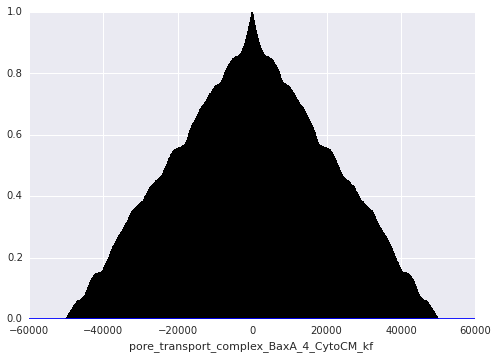

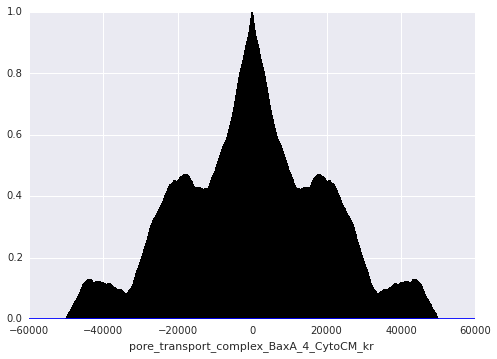

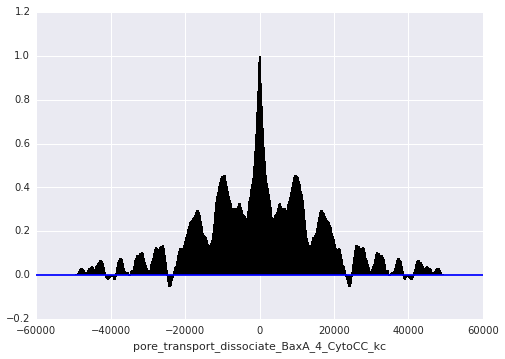

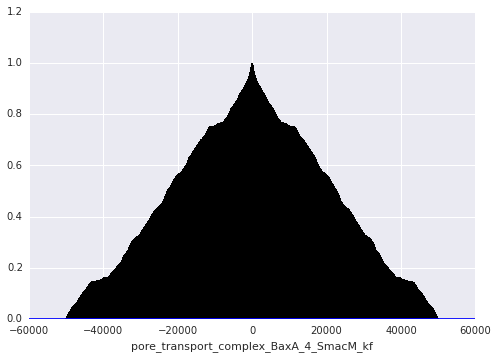

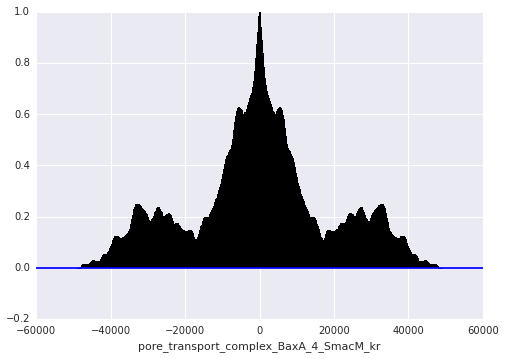

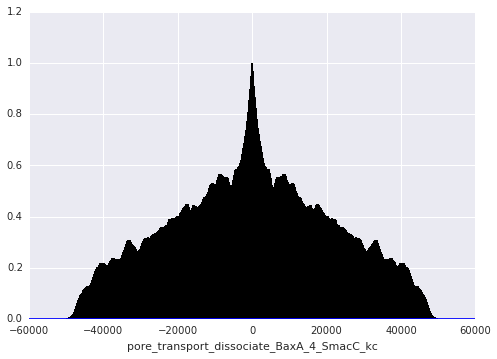

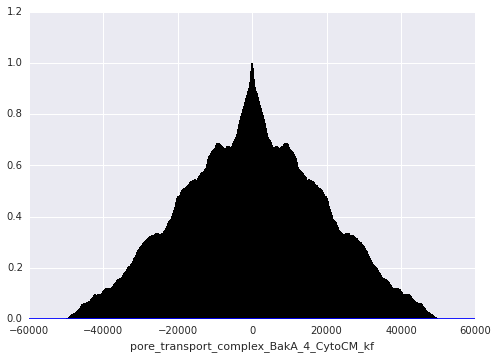

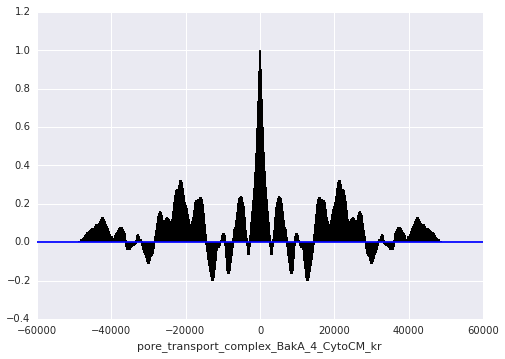

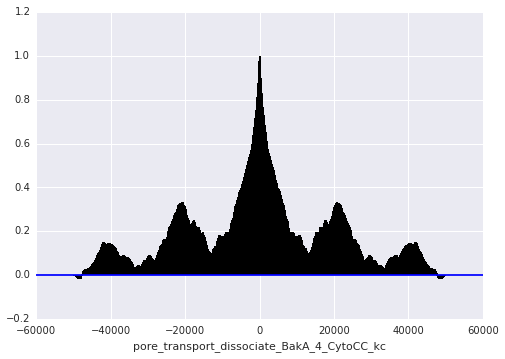

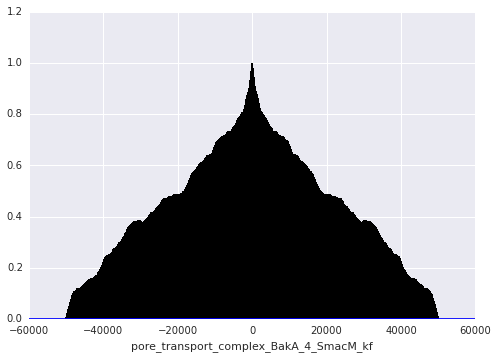

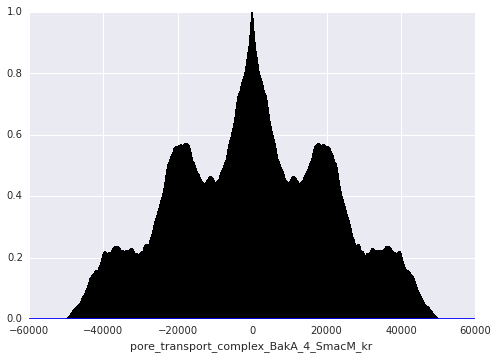

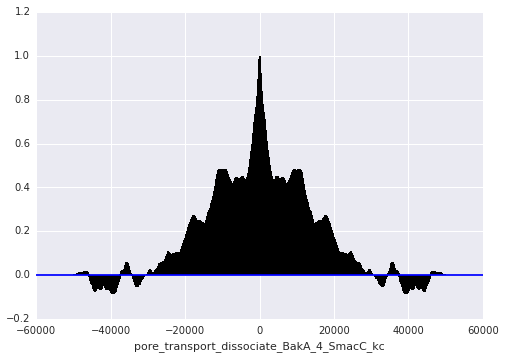

In [38]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][1][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

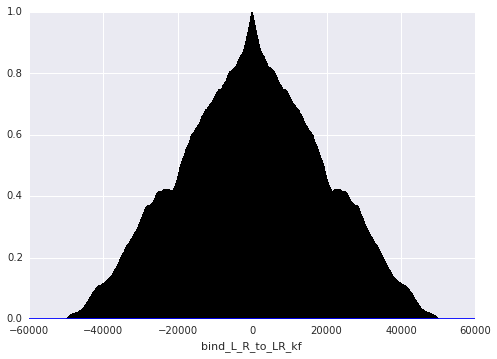

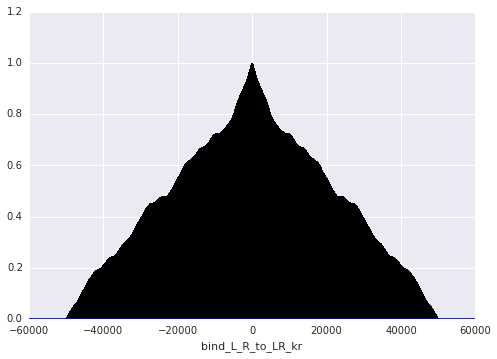

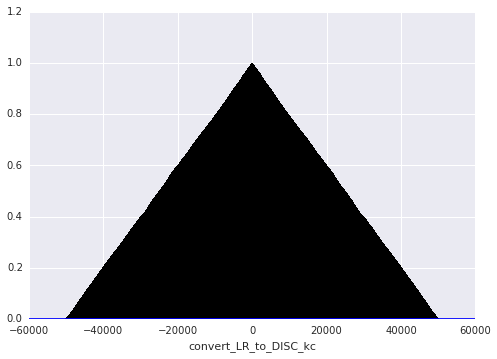

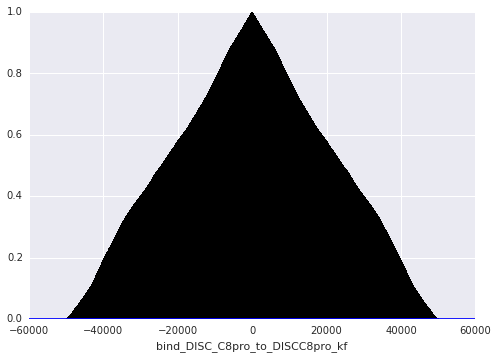

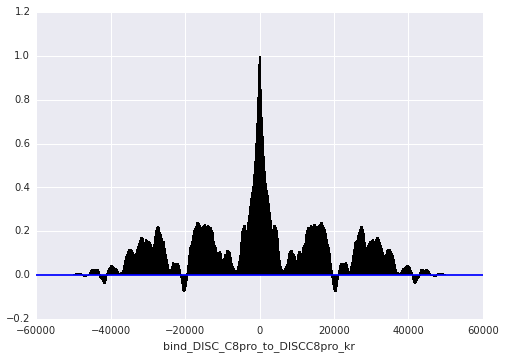

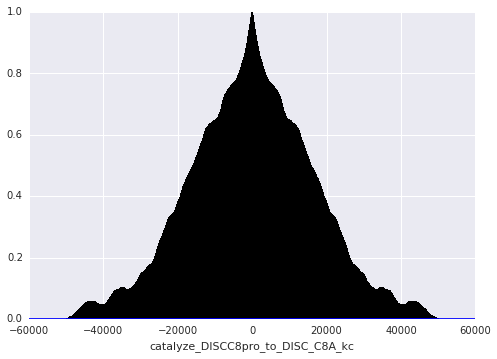

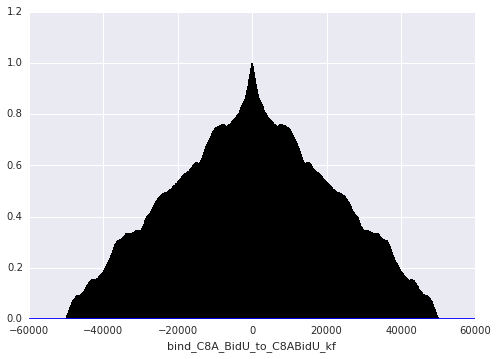

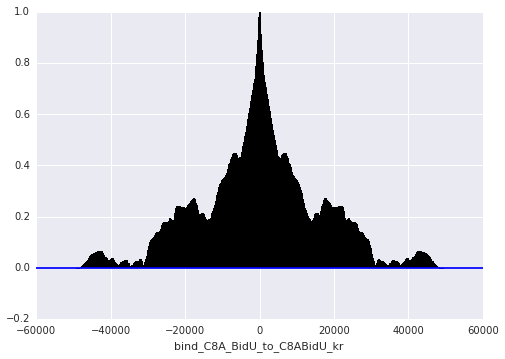

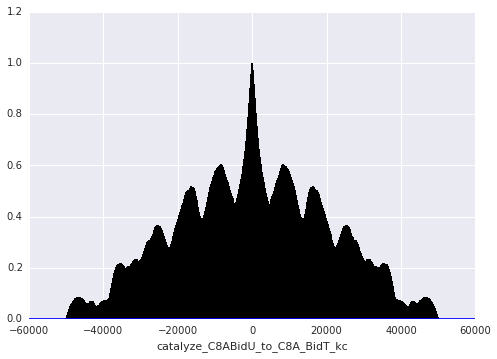

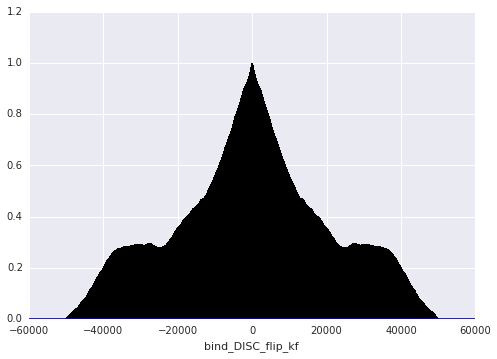

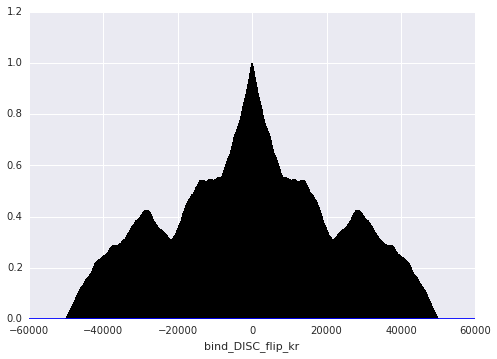

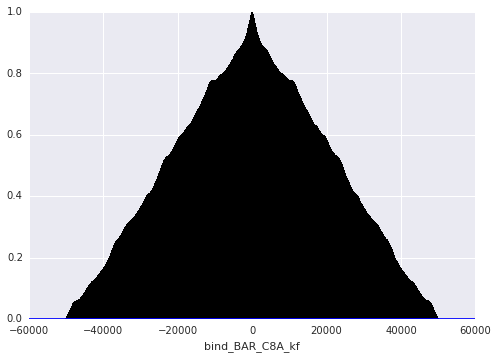

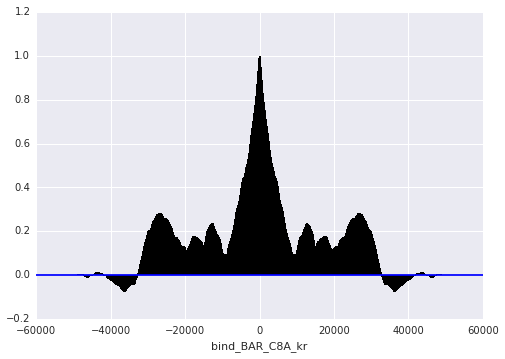

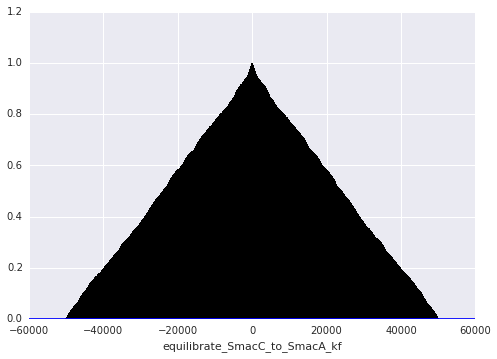

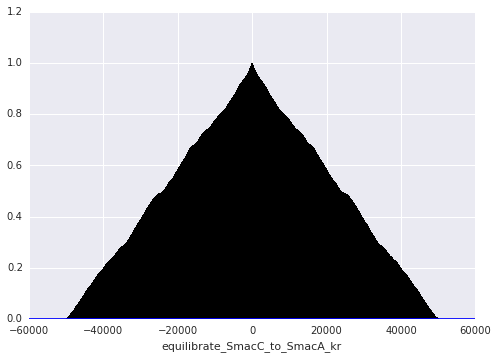

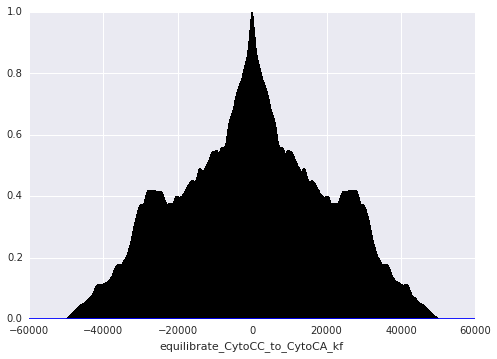

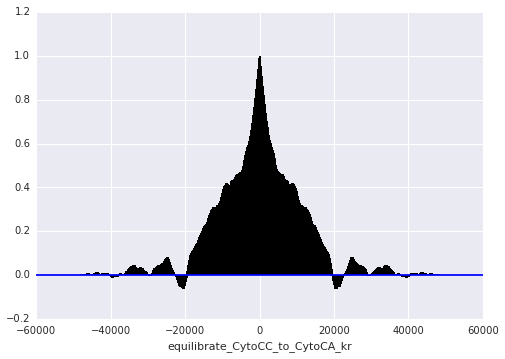

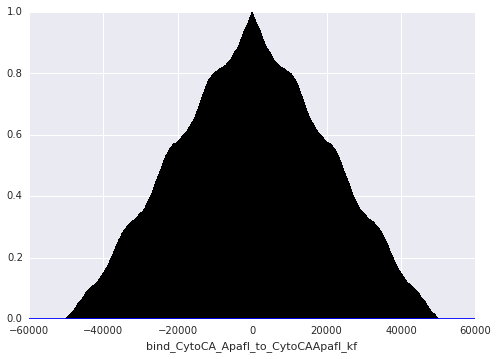

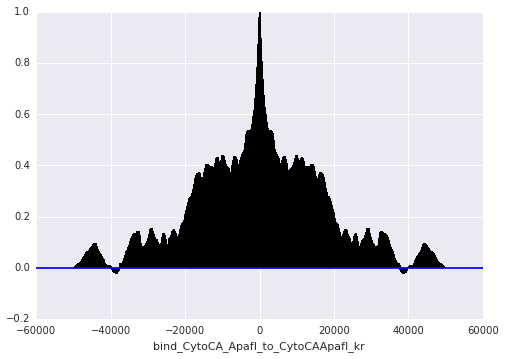

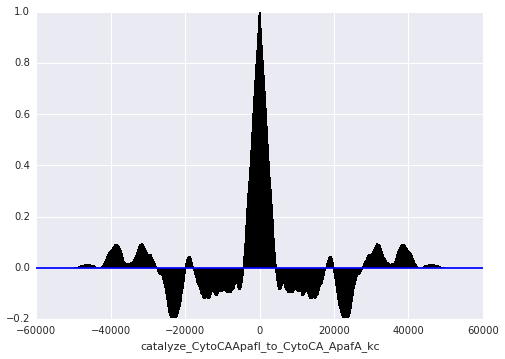

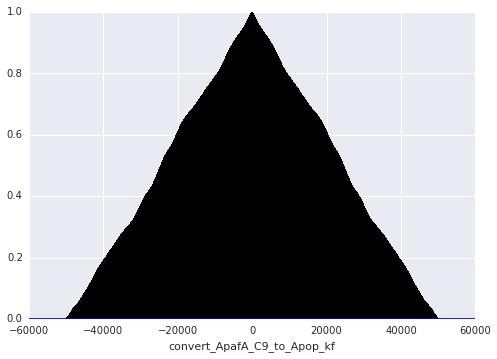

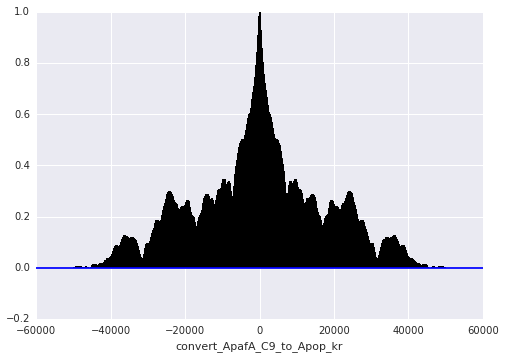

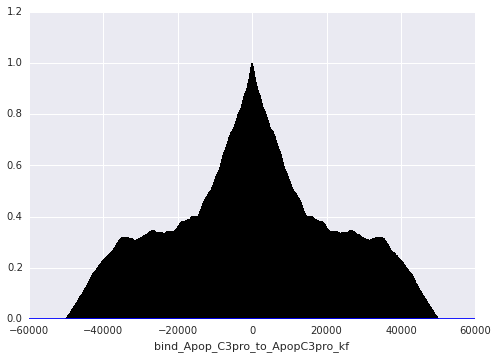

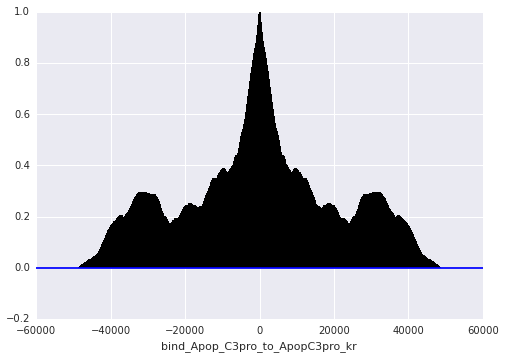

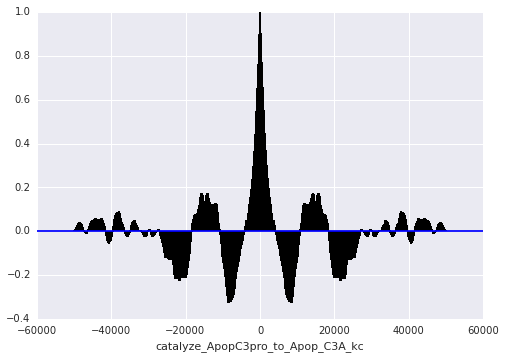

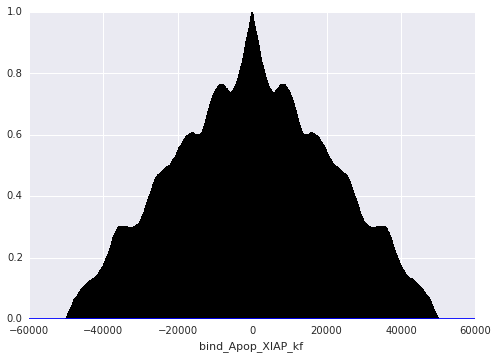

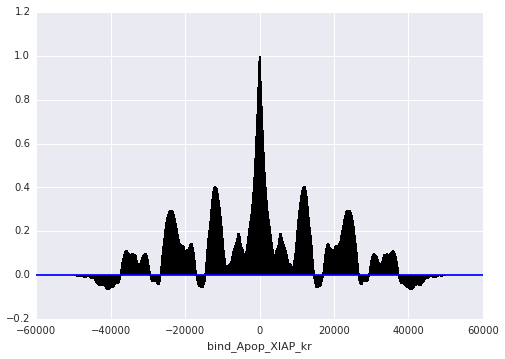

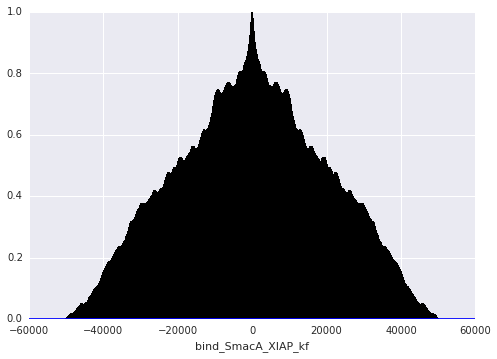

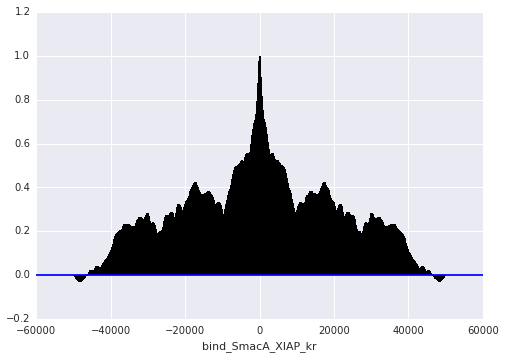

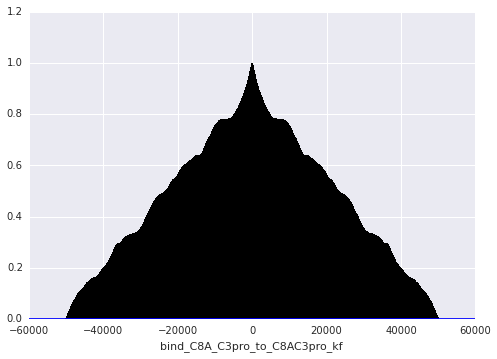

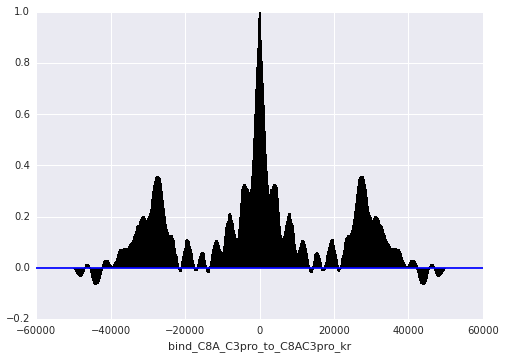

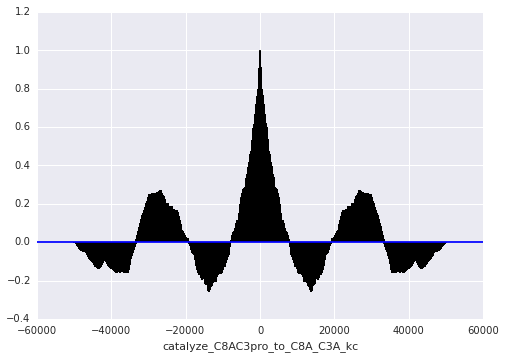

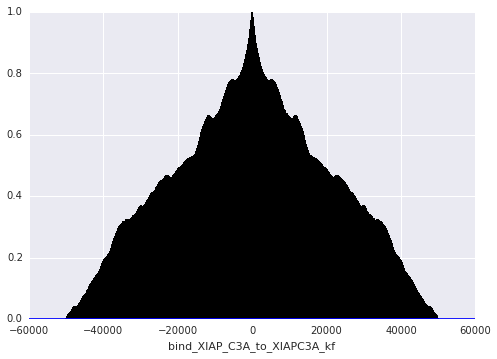

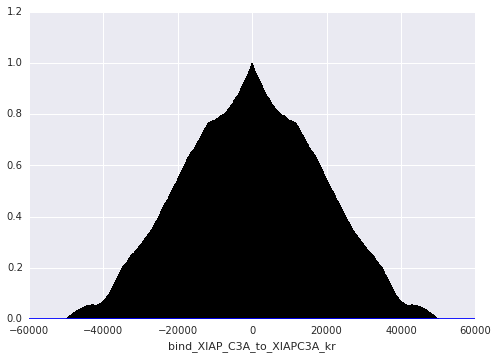

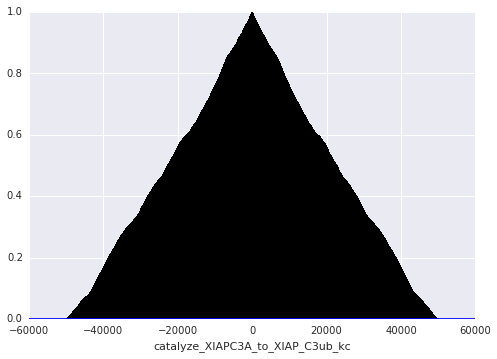

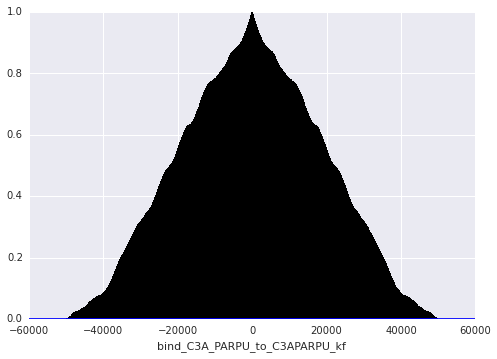

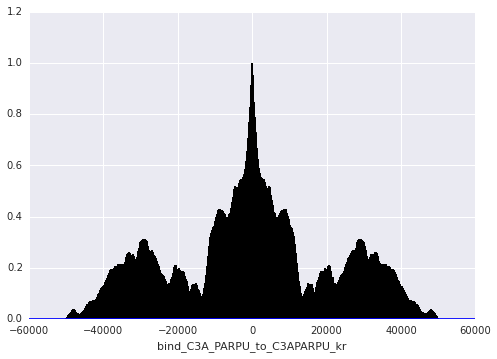

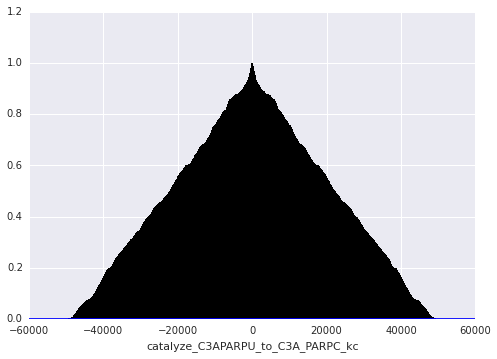

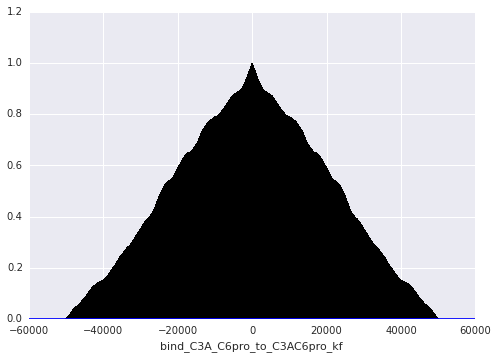

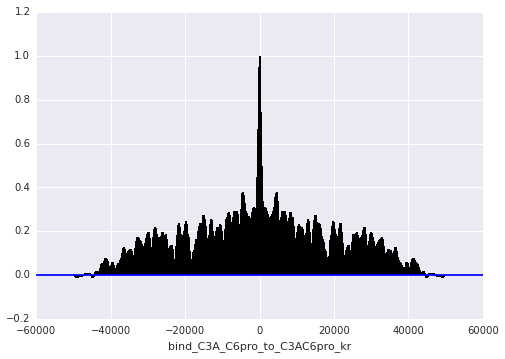

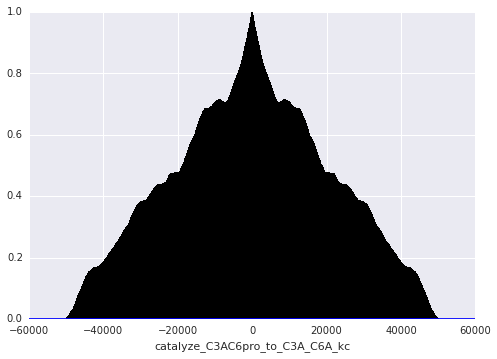

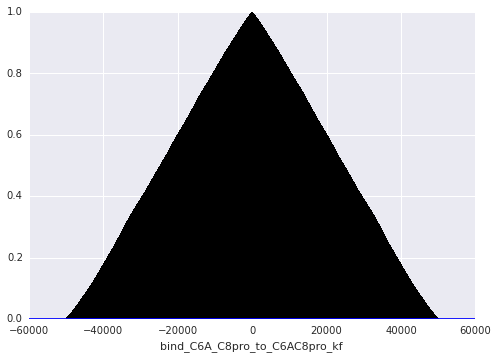

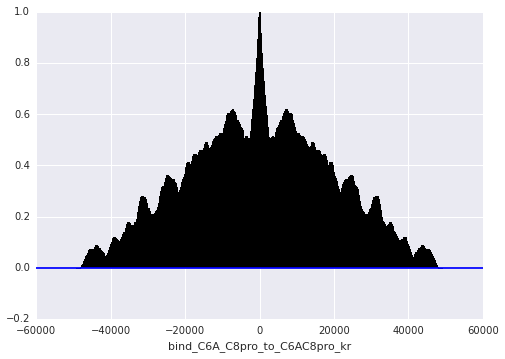

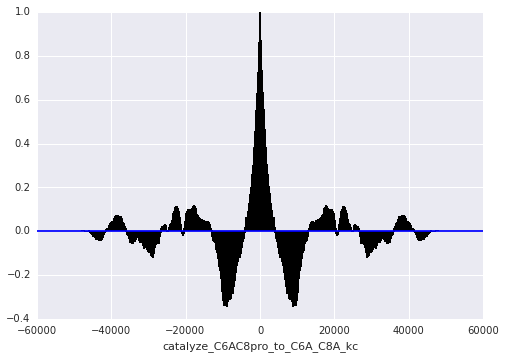

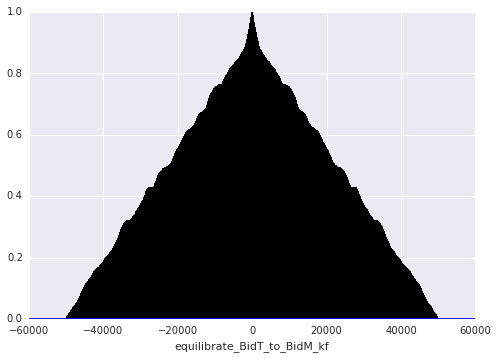

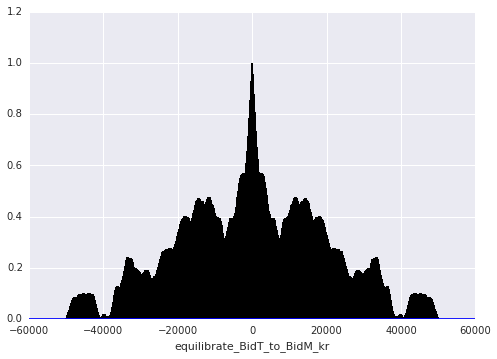

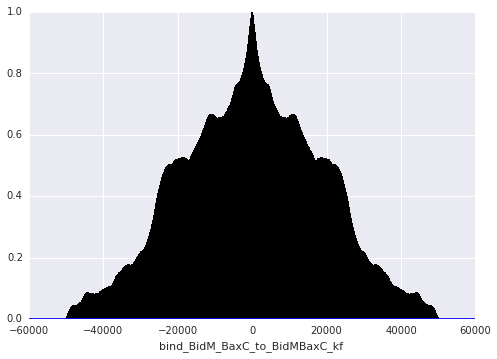

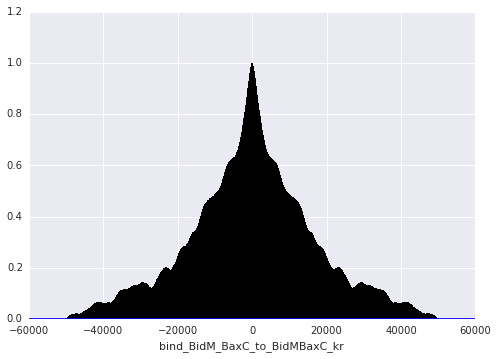

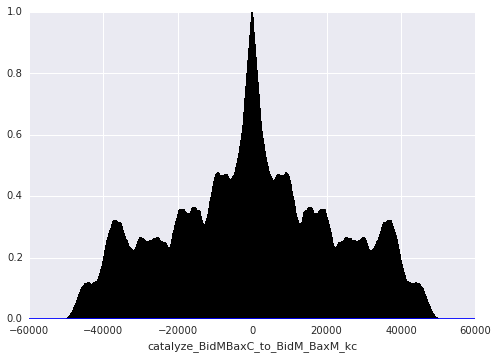

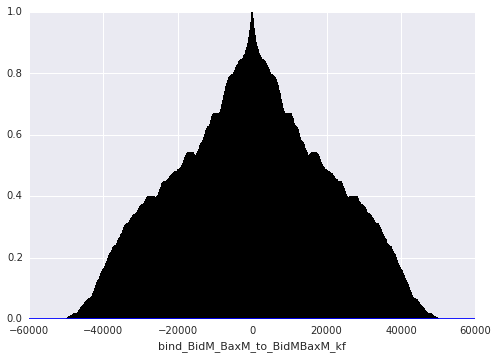

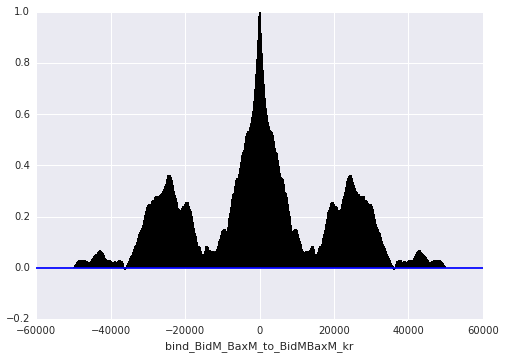

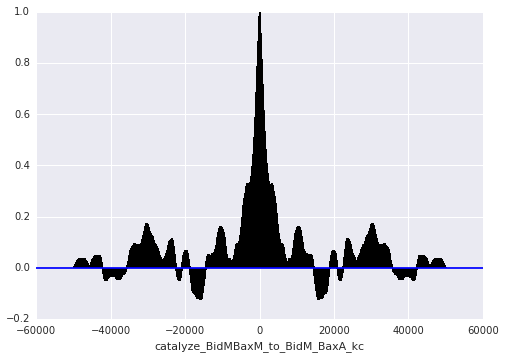

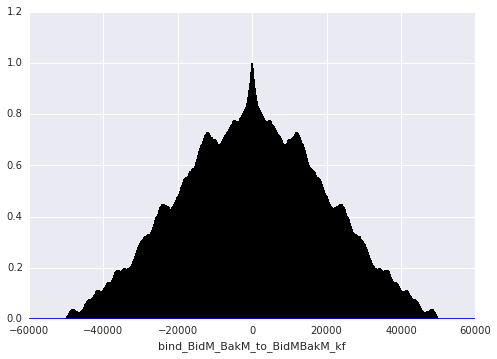

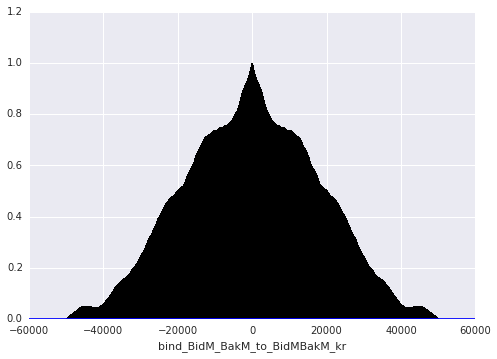

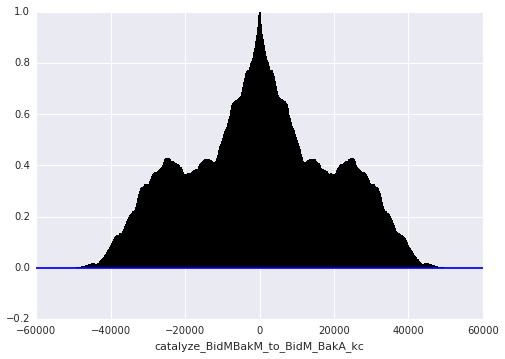

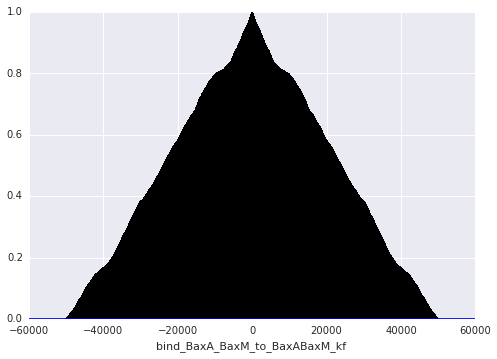

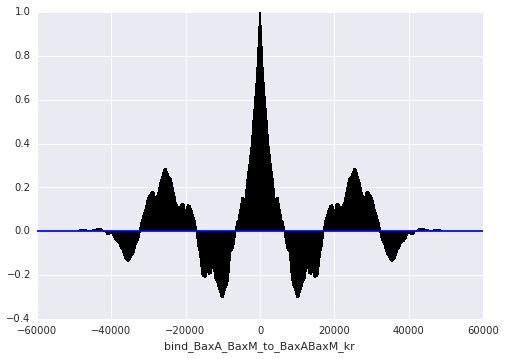

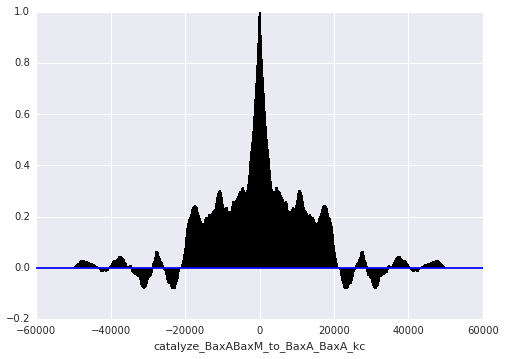

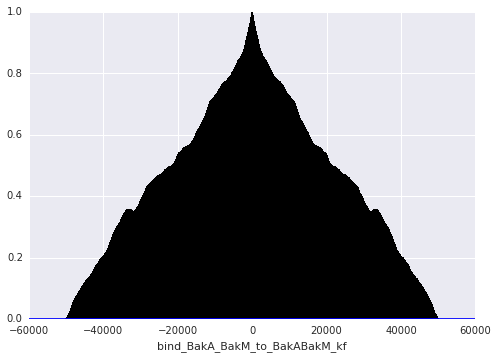

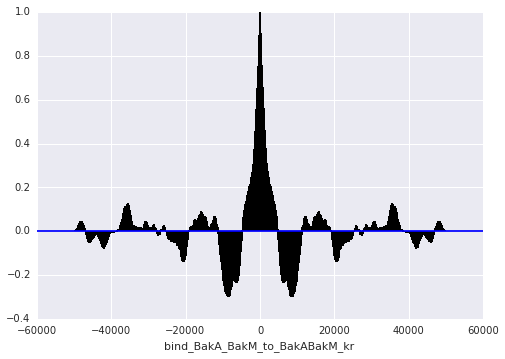

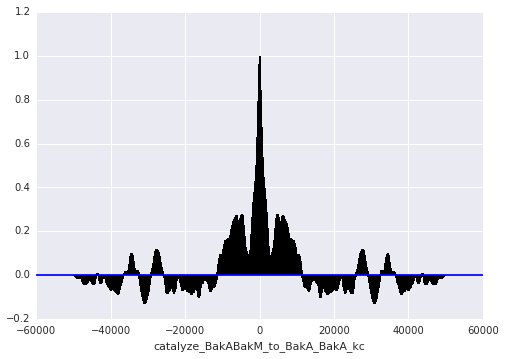

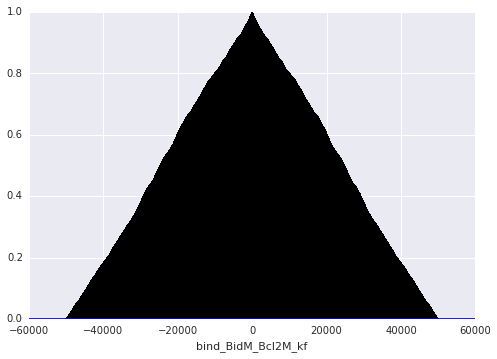

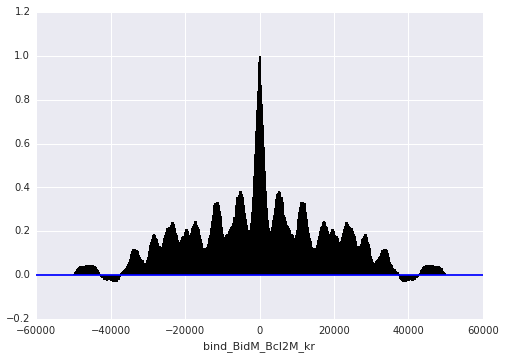

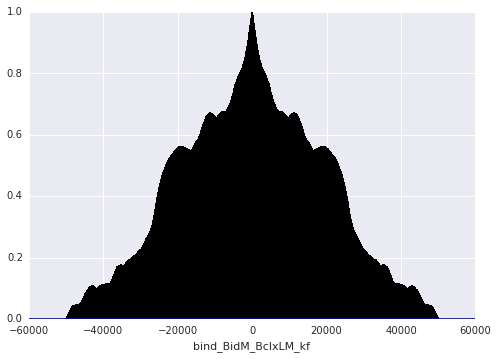

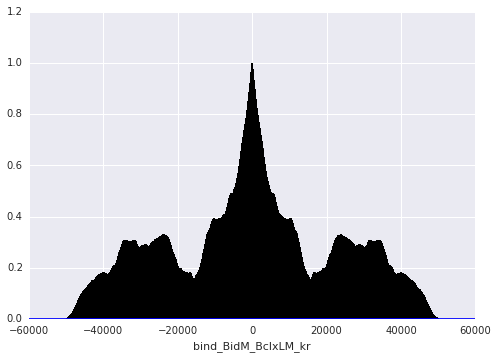

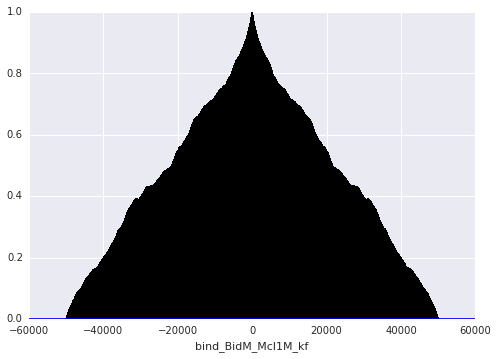

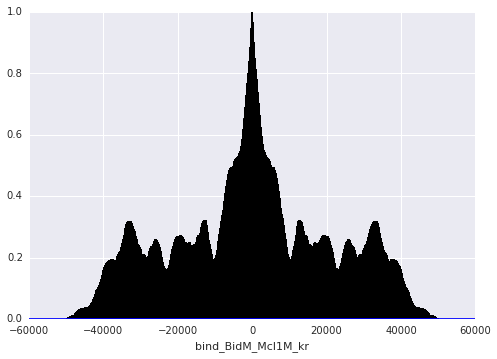

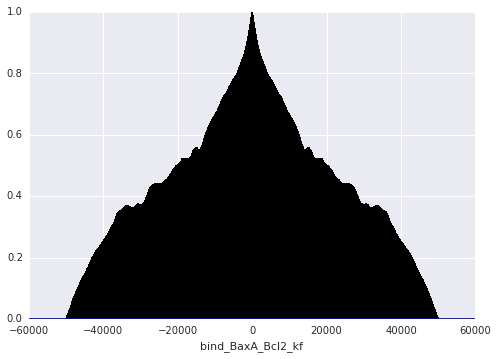

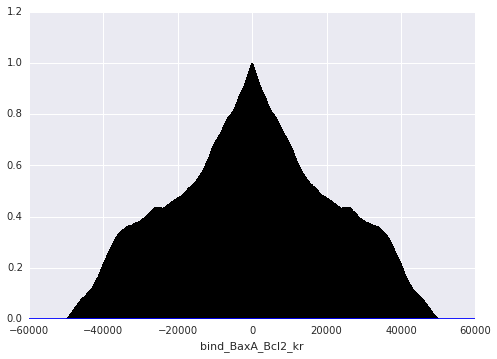

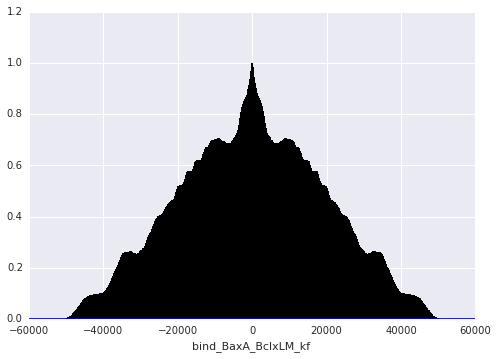

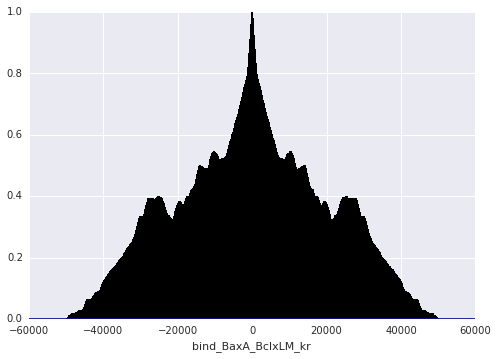

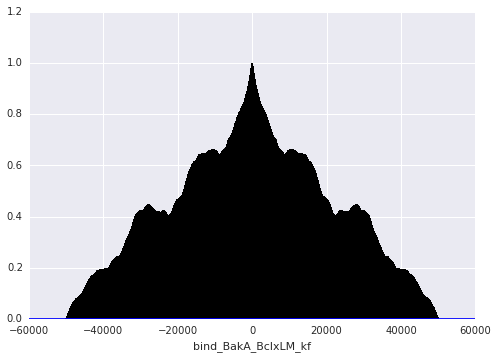

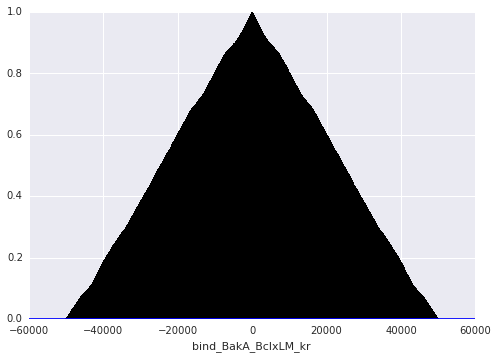

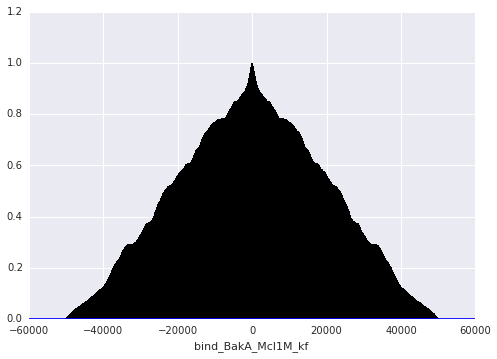

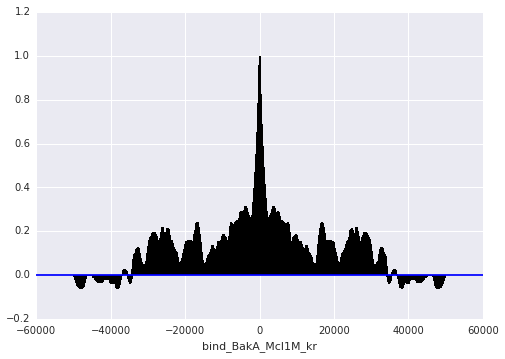

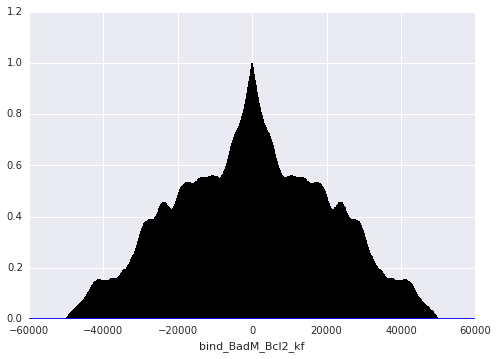

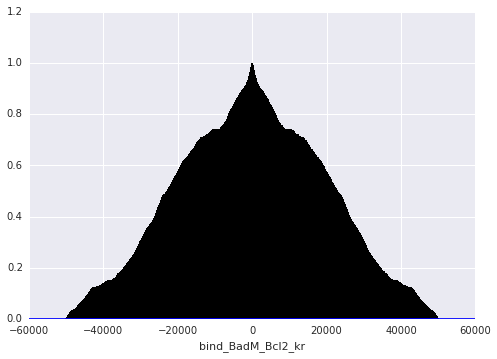

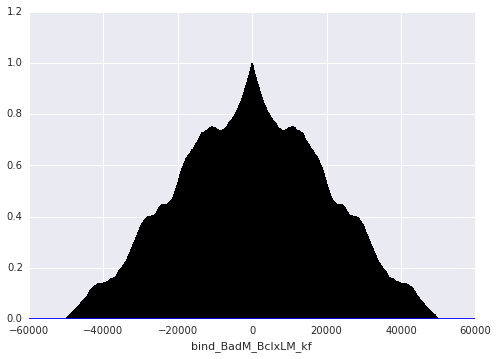

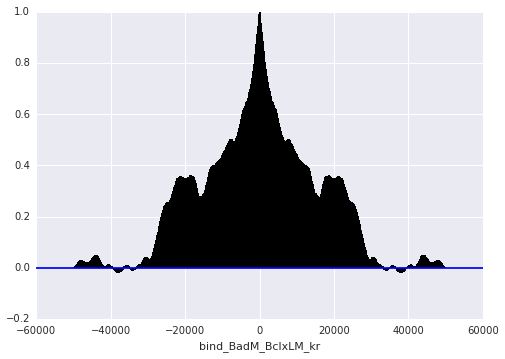

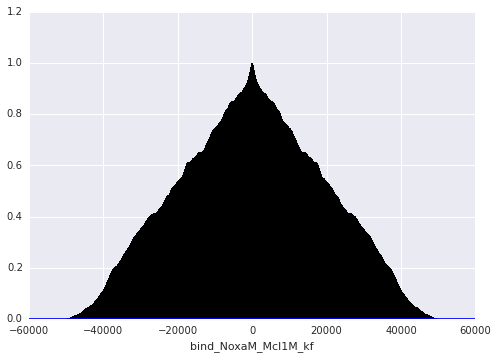

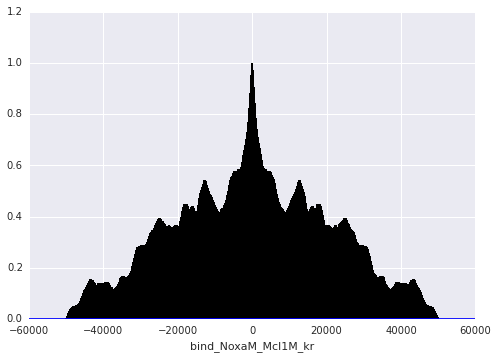

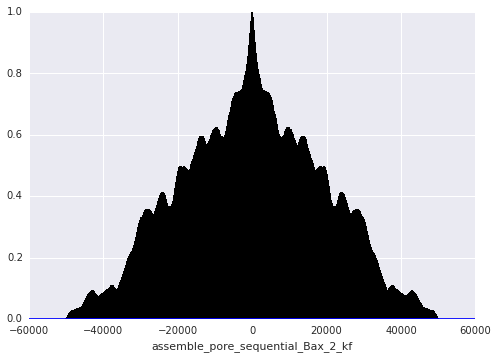

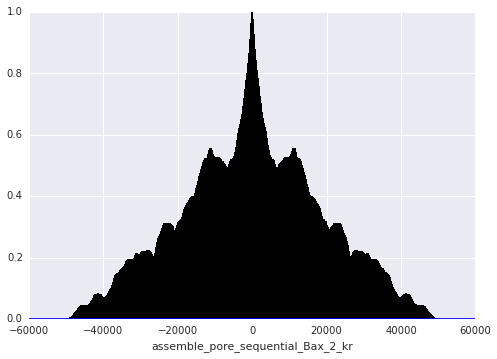

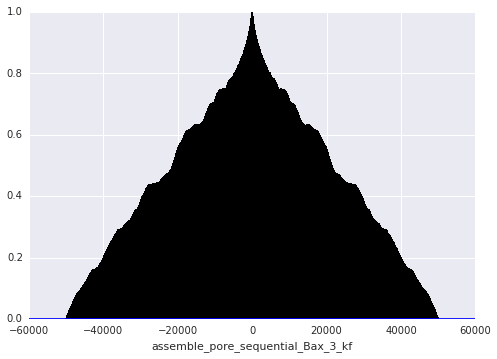

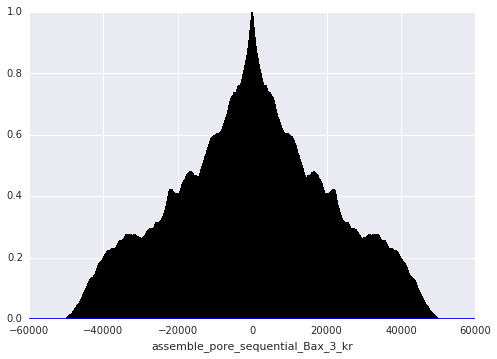

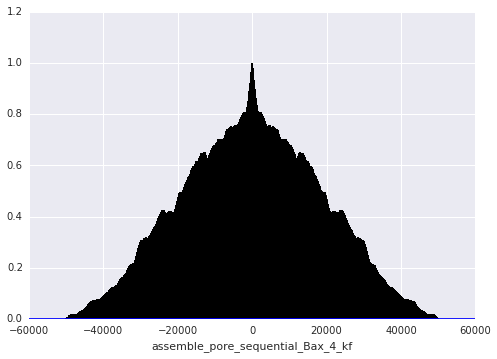

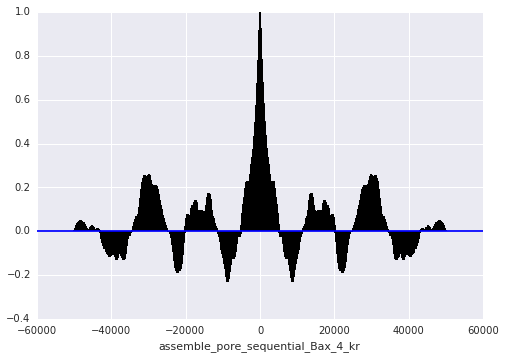

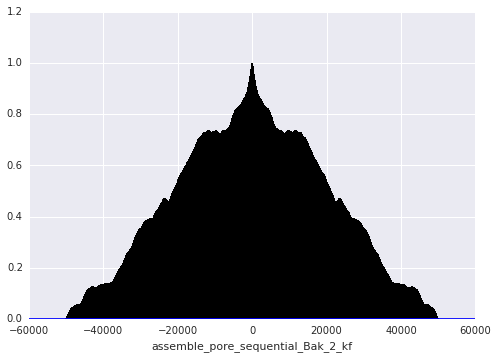

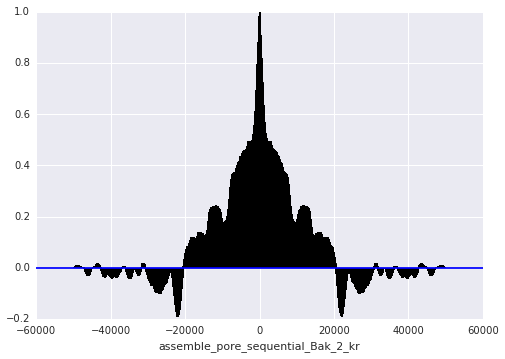

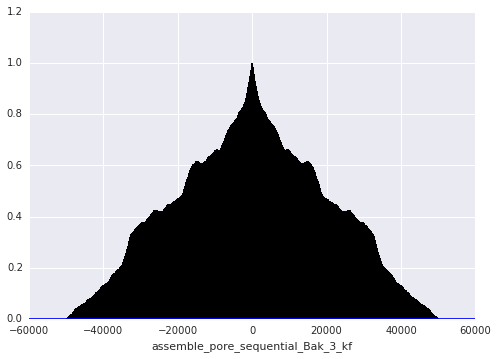

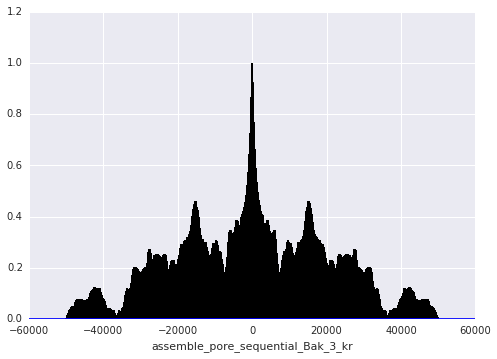

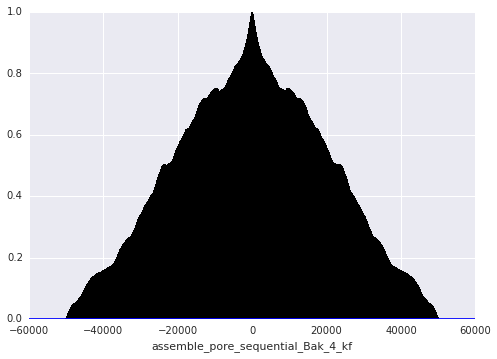

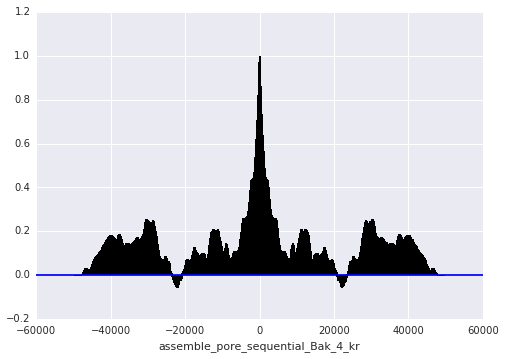

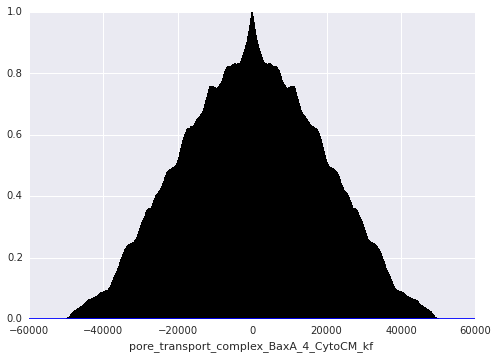

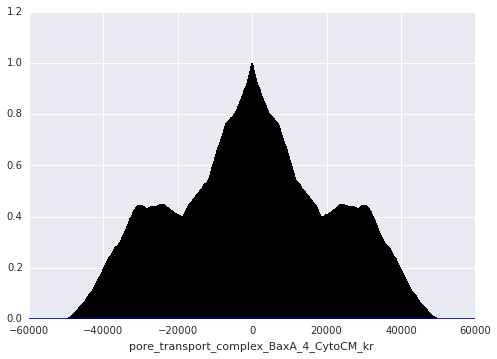

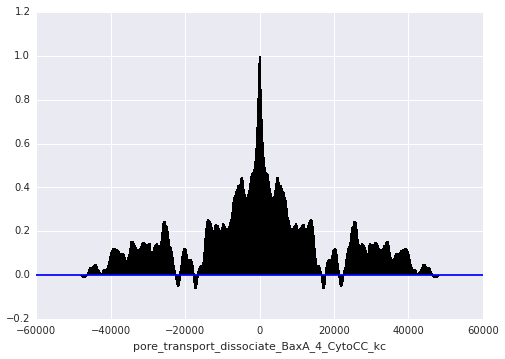

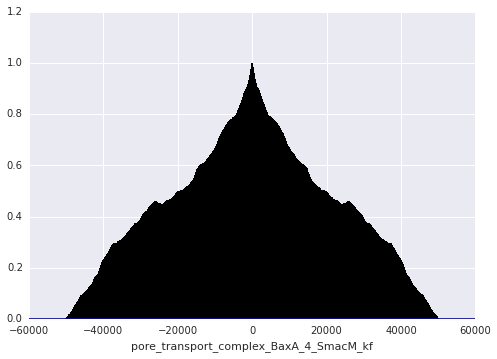

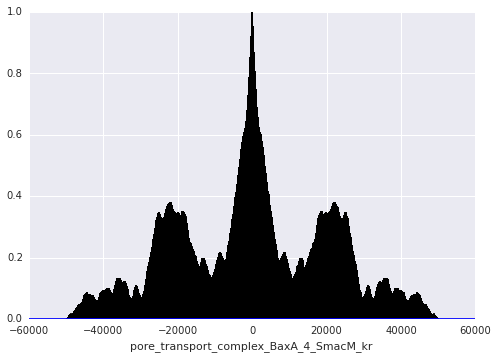

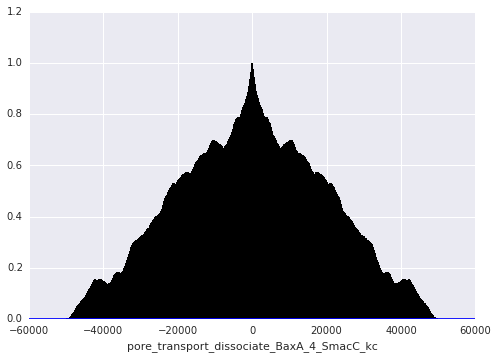

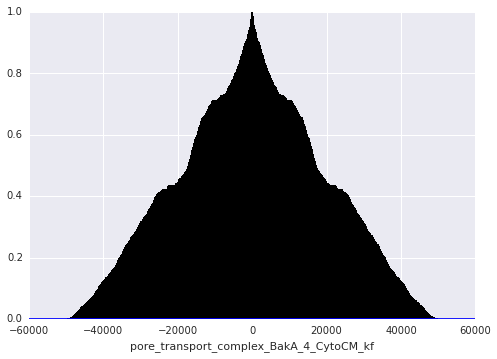

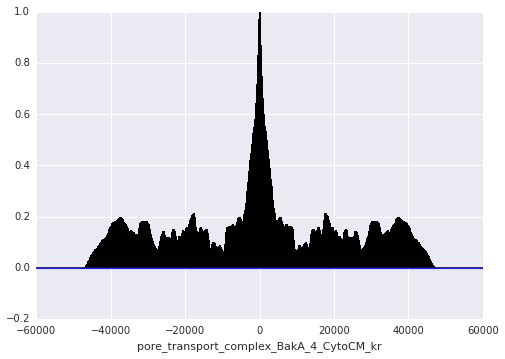

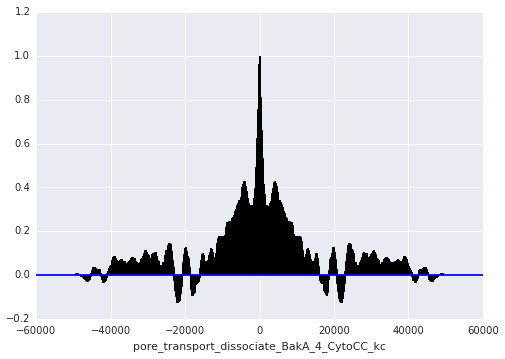

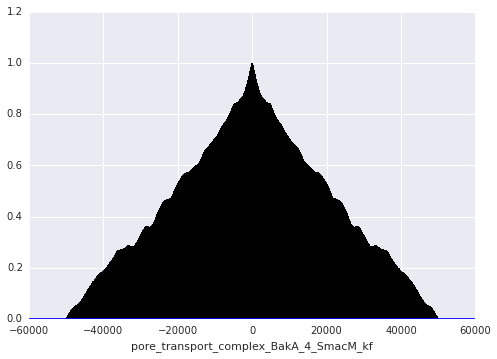

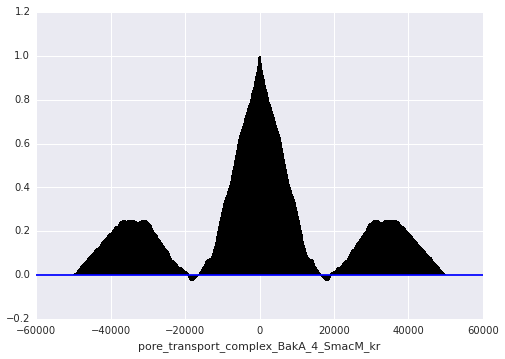

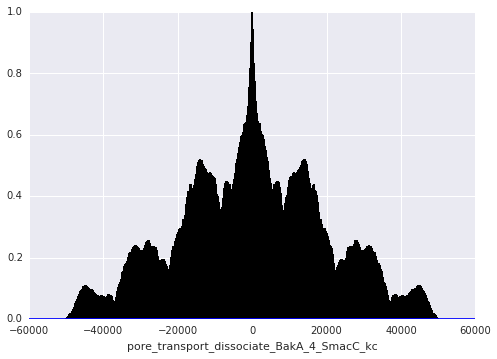

In [39]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][2][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [104]:
acceptance_rates = {}
vector_acceptance_rate = {}
running_acceptance_rates = {}
running_acceptance_rates_100window = {}
n_vector_acceptances = {}
n_100windowvec_acceptances = {}
running_acceptance_rates_vec = {}
running_acceptances_rates_vec_100window = {}
n_100window_acceptances = {}
n_acceptances = {}
for run in ['a', 'b', 'd']:
    acceptance_rates[run] = {}
    vector_acceptance_rate[run] = {}
    running_acceptance_rates[run] = {}
    running_acceptance_rates_100window[run] = {}
    n_vector_acceptances[run] = {}
    n_100windowvec_acceptances[run] = {}
    running_acceptance_rates_vec[run] = {}
    running_acceptances_rates_vec_100window[run] = {}
    n_100window_acceptances[run] = {}
    n_acceptances[run] = {}
    for chain in range(len(traces[run])):
        acceptance_rates[run][chain] = np.zeros((len(traces[run][0][0],)))
        vector_acceptance_rate[run][chain] = 0
        running_acceptance_rates[run][chain] = np.zeros((len(traces[run][0][0]), len(traces[run][0])))
        running_acceptance_rates_100window[run][chain] = np.zeros((len(traces[run][0][0]), 1000))
        n_vector_acceptances[run][chain] = 0
        n_100windowvec_acceptances[run][chain] = 0
        running_acceptance_rates_vec[run][chain] = np.zeros((1, len(traces[run][0])))
        running_acceptances_rates_vec_100window[run][chain] = np.zeros((1, 1000))
        n_100window_acceptances[run][chain] = {}
        n_acceptances[run][chain] = {}
        for dim in range(len(traces[run][chain][0])):
            n_100window_acceptances[run][chain][dim] = 0
            n_acceptances[run][chain][dim] = 0
            for iteration in range(1, len(traces[run][chain])):
                if dim == 0:
                    comparison = traces[run][chain][iteration] == traces[run][chain][iteration-1]
                    if not np.all(comparison):
                        n_vector_acceptances[run][chain] += 1
                        n_100windowvec_acceptances[run][chain] += 1
                    running_acceptance_rates_vec[run][chain][0, iteration] = float(n_vector_acceptances[run][chain])/iteration
                    if iteration % 100 == 0:
                        running_acceptances_rates_vec_100window[run][chain][0, iteration/100] = float(n_100windowvec_acceptances[run][chain])/100
                        n_100windowvec_acceptances[run][chain] = 0
                if traces[run][chain][iteration][dim] != traces[run][chain][iteration-1][dim]:
                    n_acceptances[run][chain][dim] += 1
                    n_100window_acceptances[run][chain][dim] += 1
                running_acceptance_rates[run][chain][dim, iteration] = float(n_acceptances[run][chain][dim])/iteration
        
                if iteration % 100 == 0:
                    running_acceptance_rates_100window[run][chain][dim, iteration/100] = float(n_100window_acceptances[run][chain][dim])/100
                    n_100window_acceptances[run][chain][dim] = 0
            
            acceptance_rates[run][chain][dim] = float(n_acceptances[run][chain][dim])/len(traces[run][chain])
            print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances[run][chain][dim]),' acceptance rate: ',str(acceptance_rates[run][chain][dim])
        print 'n vector acceptances: ',n_vector_acceptances[run][chain],' for run: ',run,' and chain: ',chain
        print 'Acceptance rate for vector: ',float(n_vector_acceptances[run][chain])/len(traces[run][chain]),' for run: ',run,' and chain: ',chain
running_acceptance_rates
running_acceptance_rates_100window
running_acceptance_rates_vec
running_acceptances_rates_vec_100window


N acceptances for parameter:  bind_L_R_to_LR_kf  =  9779  acceptance rate:  0.09779
N acceptances for parameter:  bind_L_R_to_LR_kr  =  9676  acceptance rate:  0.09676
N acceptances for parameter:  convert_LR_to_DISC_kc  =  9744  acceptance rate:  0.09744
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  9554  acceptance rate:  0.09554
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  9770  acceptance rate:  0.0977
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  9752  acceptance rate:  0.09752
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  9714  acceptance rate:  0.09714
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  9667  acceptance rate:  0.09667
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  9675  acceptance rate:  0.09675
N acceptances for parameter:  bind_DISC_flip_kf  =  9715  acceptance rate:  0.09715
N acceptances for parameter:  bind_DISC_flip_kr  =  9360  acceptance rate:  0.0

{'a': {0: array([[ 0.  ,  0.01,  0.09,  0.15,  0.29,  0.22,  0.26,  0.36,  0.27,
           0.32,  0.37,  0.38,  0.31,  0.32,  0.35,  0.34,  0.39,  0.39,
           0.43,  0.46,  0.47,  0.4 ,  0.37,  0.32,  0.49,  0.47,  0.43,
           0.36,  0.35,  0.42,  0.37,  0.37,  0.35,  0.35,  0.36,  0.3 ,
           0.37,  0.34,  0.38,  0.36,  0.35,  0.32,  0.31,  0.48,  0.41,
           0.33,  0.36,  0.36,  0.33,  0.33,  0.35,  0.27,  0.28,  0.33,
           0.36,  0.35,  0.36,  0.29,  0.2 ,  0.26,  0.35,  0.29,  0.33,
           0.28,  0.37,  0.26,  0.34,  0.18,  0.24,  0.24,  0.34,  0.24,
           0.34,  0.3 ,  0.32,  0.23,  0.37,  0.25,  0.18,  0.3 ,  0.34,
           0.4 ,  0.36,  0.24,  0.38,  0.36,  0.27,  0.38,  0.31,  0.3 ,
           0.31,  0.34,  0.31,  0.31,  0.35,  0.37,  0.34,  0.43,  0.26,
           0.43,  0.37,  0.32,  0.33,  0.36,  0.28,  0.34,  0.31,  0.33,
           0.35,  0.26,  0.29,  0.35,  0.29,  0.33,  0.27,  0.31,  0.35,
           0.32,  0.28,  0.36,  0.32,  0.26

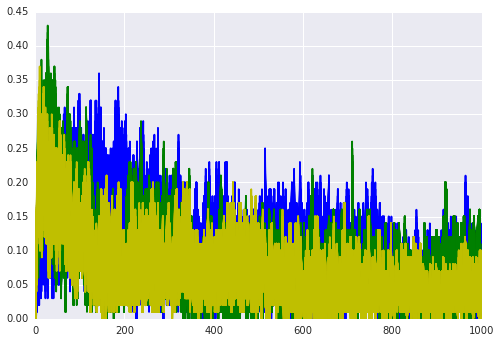

In [106]:
for run in ['a', 'b', 'd']:
    for chain in range(len(traces[run])):
        for dim in range(105):
            if run == 'a':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'b')
            elif run == 'b':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'g')
            elif run == 'c':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'r')
            elif run == 'd':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'y')

In [107]:
adapted_crossover_vals = {}
adapted_gamma_vals = {}
joint_probs = {}
for run in ['a', 'b', 'd']:
    adapted_gamma_vals[run] = np.load('earm_dreamzs_3chain_uniform_gammalevels_25000burnin_'+run+'_DREAM_chain_adapted_gammalevelprob.npy')
    adapted_crossover_vals[run] = np.load('earm_dreamzs_3chain_uniform_gammalevels_25000burnin_'+run+'_DREAM_chain_adapted_crossoverprob.npy')
    #joint_probs[run] = adapted_crossover_vals[run]*[adapted_gamma_vals[run][level] for level in range(len(adapted_gamma_vals[run]))]


In [108]:
adapted_crossover_vals

{'a': array([ 0.37195137,  0.4049938 ,  0.22305483]),
 'b': array([  5.53032197e-06,   5.20635171e-01,   4.79359299e-01]),
 'd': array([ 0.1452162 ,  0.28356947,  0.57121433])}

In [109]:
adapted_gamma_vals

{'a': array([  1.16493786e-04,   4.45425830e-01,   2.20046636e-01,
          3.34411040e-01]),
 'b': array([ 0.34614983,  0.38232045,  0.21075939,  0.06077033]),
 'd': array([  7.33978282e-01,   3.40478609e-06,   1.16290219e-01,
          1.49728094e-01])}